# Lead Quality Prediction
## FicZon Inc - Sales Effectiveness using Machine Learning

###  Problem Statement

- FicZon Inc, an IT solutions provider, relies heavily on digital channels and its website for lead generation.
- However, due to increased competition and market saturation, they are experiencing a drop in sales performance.
- The current system for evaluating lead quality is manual and depends heavily on the judgment of sales staff.
- Although a lead quality process exists, it is primarily used for post-sale analysis, limiting its impact on real-time conversion rates.
- FicZon aims to leverage Machine Learning (ML) to automate and improve the categorization of lead quality—
- from manual tagging to predictive classification—enhancing the efficiency and effectiveness of its sales force.

### Dataset Overview

#### The dataset provided contains 7,422 entries and includes the following 9 columns:

| Column Name     | Description                         |
|------------------|-------------------------------------|
| Created        | Date and time of lead creation      |
| Product_ID     | Unique product identifier (float)   |
| Source         | Lead source (e.g., web, social)     |
| Mobile         | Contact number of the lead          |
| EMAIL          | Lead’s email address                |
| Sales_Agent    | Agent assigned to the lead          |
| Location       | Lead's geographical location        |
| Delivery_Mode  | Mode of product delivery            |
| Status         | Lead category (target variable)     |

###  Project Objective

#### The primary goals of the project are:

- 1. Perform Exploratory Data Analysis (EDA) to uncover insights that influence sales effectiveness.
- 2. Build and evaluate a classification model to predict the lead category (Status) as either:
     - High Potential (1)
     - Low Potential (0)

- This model is expected to assist the sales team by:
  - Automatically scoring leads based on data attributes.
  - Prioritizing high-quality leads.
  - Improving conversion rates and overall productivity.

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
import os
%load_ext autoreload
%autoreload 2
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
print("Libraries Imported Successfully!")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Libraries Imported Successfully!


In [6]:
! pip install lightgbm

In [3]:
import pandas as pd
from sqlalchemy import create_engine
from urllib.parse import quote_plus  # to encode password safely

# Connection details
username = "dm_team2"
password = "DM!$Team&27@9!20!"  # raw password
host = "18.136.157.135"
port = "3306"
database = "project_sales"

# Encode password safely
encoded_password = quote_plus(password)

# Create connection string
engine = create_engine(f"mysql+pymysql://{username}:{encoded_password}@{host}:{port}/{database}")

# Fetch dataset
df = pd.read_sql("SELECT * FROM data;", engine)

print(df.head())
print("Shape:", df.shape)


            Created Product_ID   Source      Mobile               EMAIL  \
0  14-11-2018 10:05             Website  984XXXXXXX  aXXXXXXX@gmail.com   
1  14-11-2018 09:22             Website     XXXXXXX             #VALUE!   
2  14-11-2018 09:21             Website     XXXXXXX  dXXXXXXX@yahoo.com   
3  14-11-2018 08:46             Website     XXXXXXX  wXXXXXXX@gmail.com   
4  14-11-2018 07:34             Website     XXXXXXX  cXXXXXXX@gmail.com   

      Sales_Agent Location Delivery_Mode Status  
0  Sales-Agent-11                 Mode-5   Open  
1  Sales-Agent-10                 Mode-5   Open  
2  Sales-Agent-10                 Mode-5   Open  
3  Sales-Agent-10                 Mode-5   Open  
4  Sales-Agent-10                 Mode-5   Open  
Shape: (7422, 9)


In [5]:
# Save to CSV
df.to_csv("sales_data.csv", index=False)

In [6]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Step 1: Load the data
df = pd.read_csv('sales_data.csv')  

# Step 2: Define categorical columns and imputer
categorical_cols = ['Product_ID', 'Source', 'Sales_Agent', 'Location']
cat_imputer = SimpleImputer(strategy='most_frequent')

# Step 3: Apply imputation
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])


### Load Dataset:

In [7]:
df = pd.read_csv('sales_data.csv')

In [8]:
df.head()

Created  Product_ID   Source      Mobile               EMAIL  \
0  14-11-2018 10:05         NaN  Website  984XXXXXXX  aXXXXXXX@gmail.com   
1  14-11-2018 09:22         NaN  Website     XXXXXXX             #VALUE!   
2  14-11-2018 09:21         NaN  Website     XXXXXXX  dXXXXXXX@yahoo.com   
3  14-11-2018 08:46         NaN  Website     XXXXXXX  wXXXXXXX@gmail.com   
4  14-11-2018 07:34         NaN  Website     XXXXXXX  cXXXXXXX@gmail.com   

      Sales_Agent Location Delivery_Mode Status  
0  Sales-Agent-11      NaN        Mode-5   Open  
1  Sales-Agent-10      NaN        Mode-5   Open  
2  Sales-Agent-10      NaN        Mode-5   Open  
3  Sales-Agent-10      NaN        Mode-5   Open  
4  Sales-Agent-10      NaN        Mode-5   Open

In [9]:
df.tail()

Created  Product_ID            Source Mobile  \
7417  28-04-2018 09:45         9.0              Call    NaN   
7418  28-04-2018 09:43        15.0              Call    NaN   
7419  28-04-2018 09:20         5.0  Live Chat-Direct    NaN   
7420  28-04-2018 08:04        21.0          CRM form    NaN   
7421  28-04-2018 07:54        25.0           Website    NaN   

                   EMAIL     Sales_Agent         Location Delivery_Mode  \
7417  aXXXXXXX@gmail.com   Sales-Agent-6           Mumbai        Mode-4   
7418             #VALUE!  Sales-Agent-12  Other Locations        Mode-5   
7419  sXXXXXXX@gmail.com  Sales-Agent-11        Bangalore        Mode-1   
7420  YXXXXXXX@gmail.com   Sales-Agent-4  Other Locations        Mode-1   
7421  cXXXXXXX@gmail.com   Sales-Agent-3          Chennai        Mode-1   

              Status  
7417            LOST  
7418            LOST  
7419  Not Responding  
7420    Just Enquiry  
7421       CONVERTED

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Created        7422 non-null   object 
 1   Product_ID     7364 non-null   float64
 2   Source         7405 non-null   object 
 3   Mobile         5612 non-null   object 
 4   EMAIL          7422 non-null   object 
 5   Sales_Agent    7399 non-null   object 
 6   Location       7364 non-null   object 
 7   Delivery_Mode  7422 non-null   object 
 8   Status         7422 non-null   object 
dtypes: float64(1), object(8)
memory usage: 522.0+ KB


In [11]:
df.describe()

Product_ID
count  7364.000000
mean     15.947311
std       6.072937
min       0.000000
25%      12.000000
50%      18.000000
75%      19.000000
max      28.000000

## Basic Data Checks

#### 1. Dataset Dimensions
- **Total Rows:** 7422
- **Total Columns:** 9

#### 2. Column Overview
| Column Name     | Data Type | Missing Values | Description               |
|------------------|-----------|----------------|---------------------------|
| Created          | object    | 0              | Lead creation timestamp   |
| Product_ID       | float64   | 58             | Product identifier        |
| Source           | object    | 17             | Lead source               |
| Mobile           | object    | 1810           | Mobile number             |
| EMAIL            | object    | 0              | Email address             |
| Sales_Agent      | object    | 23             | Assigned sales rep        |
| Location         | object    | 58             | Customer location         |
| Delivery_Mode    | object    | 0              | Mode of delivery          |
| Status           | object    | 0              | Lead status (target)      |

#### 3. Missing Value Summary
- **Mobile** has ~24% missing data.
- **Product_ID, Source, Sales_Agent, Location** have minor missing values (<1%).
- **EMAIL, Created, Delivery_Mode, Status** have no missing values.

#### 4. Duplicates

In [12]:
# Check how many duplicates exist
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Drop duplicate rows
df = df.drop_duplicates()

# Confirm removal
print(f"Shape after dropping duplicates: {df.shape}")

Number of duplicate rows: 2
Shape after dropping duplicates: (7420, 9)


In [13]:
#Check for duplicate rows:
df.duplicated().sum()

0

#### 5. Data Type Validation
- Created: should be converted to datetime
- Product_ID: numerical
- Status: categorical target, should be encoded as binary (e.g. High Potential → 1, Low Potential → 0)

#### 6. Unique Value Counts 

In [14]:
df['Status'].value_counts()
df['Source'].unique()

array(['Website', nan, 'Live Chat-Google Organic', 'Call',
       'Live Chat-Direct', 'By Recommendation', 'Customer Referral',
       'Live Chat-Blog', 'Live Chat -PPC', 'Live Chat-Google Ads',
       'Live Chat-Adwords Remarketing', 'E-Mail Message',
       'Existing Client', 'Live Chat-CPC', 'Existing Customer',
       'Live Chat-Quora', 'US Website', 'Just Dial', 'Campaign', 'Other',
       'E-mail Campaign', 'CRM form', 'SMS Campaign', 'Personal Contact',
       'Live Chat-Youtube', 'Live Chat-Justdial'], dtype=object)

#### 7. Target Variable Summary
- Goal: Predict Status (High Potential vs Low Potential)
- Should be well-balanced (check class distribution)

In [15]:
# Show first 5 rows
display(df.head().to_string)

# Shape of the dataset
print(f"\nDataset Shape: {df.shape[0]} rows and {df.shape[1]} columns")

# Column names
print("\nColumn Names:")
print(df.columns.tolist())

# Data types
print("\nData Types:")
print(df.dtypes)

# Missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
display(df.describe().to_string)

# Object type columns (Categorical features)
print("\nCategorical Columns:")
print(df.columns[df.dtypes == 'object'].tolist())

for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")
df[col].nunique()

# Check for duplicate rows
print(f"\nDuplicate Rows: {df.duplicated().sum()}")

<bound method DataFrame.to_string of             Created  Product_ID   Source      Mobile               EMAIL  \
0  14-11-2018 10:05         NaN  Website  984XXXXXXX  aXXXXXXX@gmail.com   
1  14-11-2018 09:22         NaN  Website     XXXXXXX             #VALUE!   
2  14-11-2018 09:21         NaN  Website     XXXXXXX  dXXXXXXX@yahoo.com   
3  14-11-2018 08:46         NaN  Website     XXXXXXX  wXXXXXXX@gmail.com   
4  14-11-2018 07:34         NaN  Website     XXXXXXX  cXXXXXXX@gmail.com   

      Sales_Agent Location Delivery_Mode Status  
0  Sales-Agent-11      NaN        Mode-5   Open  
1  Sales-Agent-10      NaN        Mode-5   Open  
2  Sales-Agent-10      NaN        Mode-5   Open  
3  Sales-Agent-10      NaN        Mode-5   Open  
4  Sales-Agent-10      NaN        Mode-5   Open  >


Dataset Shape: 7420 rows and 9 columns

Column Names:
['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent', 'Location', 'Delivery_Mode', 'Status']

Data Types:
Created           object
Product_ID       float64
Source            object
Mobile            object
EMAIL             object
Sales_Agent       object
Location          object
Delivery_Mode     object
Status            object
dtype: object

Missing Values:
Created             0
Product_ID         56
Source             17
Mobile           1810
EMAIL               0
Sales_Agent        23
Location           56
Delivery_Mode       0
Status              0
dtype: int64

Summary Statistics:


<bound method DataFrame.to_string of         Product_ID
count  7364.000000
mean     15.947311
std       6.072937
min       0.000000
25%      12.000000
50%      18.000000
75%      19.000000
max      28.000000>


Categorical Columns:
['Created', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent', 'Location', 'Delivery_Mode', 'Status']
Created: 6752 unique values
Source: 25 unique values
Mobile: 486 unique values
EMAIL: 883 unique values
Sales_Agent: 12 unique values
Location: 17 unique values
Delivery_Mode: 5 unique values
Status: 11 unique values

Duplicate Rows: 0


#  Basic Data Checks

This section outlines key checks performed during the initial data understanding phase.

---

## 1. Previewing the Data
**Command:** `df.head()`

- Displays the first few rows of the dataset.
- Helps understand the structure, format, and sample values of features like `Created`, `Product_ID`, `Source`, `Status`, etc.
- Quickly reveals format issues or inconsistencies.

---

## 2. Dataset Shape
**Command:** `df.shape`

- Returns the number of rows and columns.
- Useful to assess dataset size
- (7422 rows × 9 columns).

---

## 3. Column Names
**Command:** `df.columns.tolist()`

['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent', 'Location', 'Delivery_Mode', 'Status']


- Lists all column headers.
- Ensures naming consistency and avoids issues due to typos or extra spaces.

---

## 4. Data Types
**Command:** `df.dtypes`

- Shows the data type of each column
- ##### Column-wise Data Types

| Column         | Data Type |
|----------------|------------|
| Created        | object     |
| Product_ID     | float64    |
| Source         | object     |
| Mobile         | object     |
| EMAIL          | object     |
| Sales_Agent    | object     |
| Location       | object     |
| Delivery_Mode  | object     |
| Status         | object     |

---
#####  Insights

- The `Created` column should be **converted to datetime** for temporal analysis.
- `Product_ID` is numeric (`float64`) — may require imputation for missing values.
- Most other columns are **categorical/object**, suitable for encoding during preprocessing.
- `Mobile` and `EMAIL` are currently object types and may be considered for removal if not predictive.

---
- Confirms that:
  - Dates are parsed correctly (`Created`)
  - Numeric fields are not misclassified as objects

---

## 5. Missing Values
**Command:** `df.isnull().sum()`

This section highlights the number of missing values in each column of the dataset.

---

###### Column-wise Missing Value Count

| Column         | Missing Values |
|----------------|----------------|
| Created        | 0              |
| Product_ID     | 56             |
| Source         | 17             |
| Mobile         | 1810           |
| EMAIL          | 0              |
| Sales_Agent    | 23             |
| Location       | 56             |
| Delivery_Mode  | 0              |
| Status         | 0              |

---

##  Total Missing Values in Dataset

**Total Missing Entries:**  
`56 + 17 + 1810 + 23 + 56 = 1962`

 `Created`, `EMAIL`, `Delivery_Mode`, and `Status` columns are **complete with no missing values**.

 Columns with notable missing data:
- `Mobile`: 1,810 missing values
- `Product_ID`, `Location`: 56 each
- `Sales_Agent`: 23
- `Source`: 17

---

- Identifies columns with missing values.
- Informs decisions for imputation or dropping (`Product_ID`, `Source`, `Mobile`, `Sales_Agent`, and `Location` often have nulls).

---

## 6. Unique Values per Column
**Command:** `df[col].nunique()`
| Column         | Unique Values |
|----------------|----------------|
| Created        | 6752           |
| Source         | 25             |
| Mobile         | 486            |
| EMAIL          | 883            |
| Sales_Agent    | 12             |
| Location       | 17             |
| Delivery_Mode  | 5              |
| Status         | 11             |

- Counts distinct values in each column.
- Helps determine categorical vs. numerical features.
- Checks for high-cardinality fields like `Sales_Agent`.

---

## 7. Summary Statistics 
**Command:** `df.describe()`

- Generates statistics (mean, std, min, max, quartiles) for numerical columns.
- Helps with:
  - Outlier detection
  - Distribution understanding
  - Data scaling decisions

| Statistic | Value     |
|-----------|-----------|
| Count     | 7364      |
| Mean      | 15.95     |
| Std Dev   | 6.07      |
| Min       | 0.00      |
| 25%       | 12.00     |
| 50%       | 18.00     |
| 75%       | 19.00     |
| Max       | 28.00     |

---

######  Insights:
- The average Product_ID is approximately **15.95**.
- The distribution appears right-skewed, with some values down to **0** and up to **28**.
- The **standard deviation** suggests moderate spread.

---

##  Why These Checks Matter

These checks ensure:
- Data integrity before modeling
- Awareness of data quality issues
- Smooth pipeline integration for ML models
- Prevention of runtime errors caused by NaNs, incorrect types, or bad formatting

---

### Data Cleaning & Preprocessing:

In [16]:
df.loc[df[['Product_ID','Source','Mobile','Sales_Agent','Location']].isnull().any(axis=1)]

Created  Product_ID            Source      Mobile  \
0     14-11-2018 10:05         NaN           Website  984XXXXXXX   
1     14-11-2018 09:22         NaN           Website     XXXXXXX   
2     14-11-2018 09:21         NaN           Website     XXXXXXX   
3     14-11-2018 08:46         NaN           Website     XXXXXXX   
4     14-11-2018 07:34         NaN           Website     XXXXXXX   
...                ...         ...               ...         ...   
7417  28-04-2018 09:45         9.0              Call         NaN   
7418  28-04-2018 09:43        15.0              Call         NaN   
7419  28-04-2018 09:20         5.0  Live Chat-Direct         NaN   
7420  28-04-2018 08:04        21.0          CRM form         NaN   
7421  28-04-2018 07:54        25.0           Website         NaN   

                   EMAIL     Sales_Agent         Location Delivery_Mode  \
0     aXXXXXXX@gmail.com  Sales-Agent-11              NaN        Mode-5   
1                #VALUE!  Sales-Agent-10              NaN        Mode-5   
2     dXXXXXXX@yahoo.com  Sales-Agent-10              NaN        Mode-5   
3     wXXXXXXX@gmail.com  Sales-Agent-10              NaN        Mode-5   
4     cXXXXXXX@gmail.com  Sales-Agent-10              NaN        Mode-5   
...                  ...             ...              ...           ...   
7417  aXXXXXXX@gmail.com   Sales-Agent-6           Mumbai        Mode-4   
7418             #VALUE!  Sales-Agent-12  Other Locations        Mode-5   
7419  sXXXXXXX@gmail.com  Sales-Agent-11        Bangalore        Mode-1   
7420  YXXXXXXX@gmail.com   Sales-Agent-4  Other Locations        Mode-1   
7421  cXXXXXXX@gmail.com   Sales-Agent-3          Chennai        Mode-1   

              Status  
0               Open  
1               Open  
2               Open  
3               Open  
4               Open  
...              ...  
7417            LOST  
7418            LOST  
7419  Not Responding  
7420    Just Enquiry  
7421       CONVERTED  

[1889 rows x 9 columns]

In [17]:
# There is record with NAN values with different featuers so,we are dropping that record:
df.dropna(inplace=True)
print("\nMissing Values After Preprocessing:")
print(df.isnull().sum())


Missing Values After Preprocessing:
Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64


In [18]:
# Removing Duplicate Rows :
#Before removing duplicate records :
df.drop_duplicates()
print(f"\nDuplicate Rows Before Removal: {df.duplicated().sum()}")
#After removing duplicate records:
df.drop_duplicates(inplace=True)
print(f"\nDuplicate Rows After Removal: {df.duplicated().sum()}")


Duplicate Rows Before Removal: 0

Duplicate Rows After Removal: 0


In [19]:
df.reset_index(drop=True, inplace=True)

In [20]:
df.head()

Created  Product_ID                    Source      Mobile  \
0  13-11-2018 18:51         9.0  Live Chat-Google Organic  971XXXXXXX   
1  13-11-2018 18:48        19.0                      Call  701XXXXXXX   
2  13-11-2018 17:09        18.0                   Website  790XXXXXXX   
3  13-11-2018 16:49        15.0                   Website  970XXXXXXX   
4  13-11-2018 16:37        18.0                      Call  740XXXXXXX   

                EMAIL     Sales_Agent         Location Delivery_Mode  \
0  mXXXXXXX@gmail.com   Sales-Agent-3        Bangalore        Mode-1   
1             #VALUE!   Sales-Agent-4  Other Locations        Mode-5   
2  gXXXXXXX@gmail.com  Sales-Agent-11       Trivandrum        Mode-1   
3  aXXXXXXX@gmail.com   Sales-Agent-7        Hyderabad        Mode-1   
4  nXXXXXXX@gmail.com   Sales-Agent-7        Bangalore        Mode-1   

                 Status  
0             Potential  
1             Potential  
2             Potential  
3        Not Responding  
4  In Progress Positive

In [21]:
# convert datatypes of misclasified featuers :
df.dtypes

Created           object
Product_ID       float64
Source            object
Mobile            object
EMAIL             object
Sales_Agent       object
Location          object
Delivery_Mode     object
Status            object
dtype: object

In [22]:
def convert_dtypes(df:pd.DataFrame, columns:list)-> pd.DataFrame:
    for col in columns:
        df[col] = df[col].astype('int32')
    return df

In [23]:
df.dtypes

Created           object
Product_ID       float64
Source            object
Mobile            object
EMAIL             object
Sales_Agent       object
Location          object
Delivery_Mode     object
Status            object
dtype: object

In [24]:
# Convert 'Created' column to datetime format
df['Created'] = pd.to_datetime(df['Created'], errors='coerce')

In [25]:
# Convert 'Created' column to datetime format
df['Created'] = pd.to_datetime(df['Created'], errors='coerce')

# Extract features from the 'Created' datetime
df['Created_Year'] = df['Created'].dt.year
df['Created_Month'] = df['Created'].dt.month
df['Created_Day'] = df['Created'].dt.day
df['Created_Weekday'] = df['Created'].dt.day_name()
df['Created_Hour'] = df['Created'].dt.hour

### Date Feature Extraction

To enrich the dataset with temporal insights, we extracted the following features from the `Created` column:

- `Created_Year`: The year in which the lead was created.
- `Created_Month`: The month of creation (1–12).
- `Created_Day`: The day of the month.
- `Created_Weekday`: The day of the week (e.g., Monday, Tuesday).
- `Created_Hour`: The hour the lead was created (0–23).

These features can help detect seasonal trends, agent workloads by time, or peak conversion hours.

## Exploratory Data Analysis (EDA) :

The purpose of EDA is to understand the data distribution, detect patterns, identify missing values, and uncover relationships between features and the target variable.

---

### 1.  Target Variable (`Status`)
- The target variable `Status` represents the outcome of a sales lead.
- Unique classes: e.g., `High Potential`, `Low Potential`, etc.
- Encoded to binary classes for modeling:
  - `High Potential` → 1
  - `Low Potential` → 0
- Class distribution (after encoding)

In [26]:
df['Status'].value_counts(normalize=True)

Status
Junk Lead               0.204484
Not Responding          0.159826
Just Enquiry            0.121316
Potential               0.116615
In Progress Positive    0.103598
CONVERTED               0.099982
Long Term               0.078286
In Progress Negative    0.069246
LOST                    0.040680
Open                    0.003074
converted               0.002893
Name: proportion, dtype: float64

### 1.  Univariate Analysis
This analysis focuses on examining each variable individually.

- **Numerical Features**: Distribution, central tendency, and spread analyzed using histograms and summary statistics.
- **Categorical Features**: Frequency counts and bar plots used to understand the distribution of categories.
- **Example**:
  - `Product_ID`: Checked value distribution using histogram.
  - `Source`, `Sales_Agent`: Bar plots to check most and least frequent categories.

---

### 2.  Bivariate Analysis
This examines relationships between two variables, especially with the target variable (`Status`).

- **Categorical vs Target**: 
  - Conversion rate by `Source`, `Location`, `Delivery_Mode`, etc.
- **Numerical vs Target**: 
  - Boxplots and violin plots used to compare feature values for each class of the target.

---

### 3.  Multivariate Analysis
Analyzing interactions among three or more variables.

- **Example**: 
  - Heatmaps and pairplots used to examine how features interact and how they collectively impact the target variable.
  - Grouped aggregations (`groupby`) across multiple categorical variables with target to observe combined influence.

---

### 4.  Correlation Analysis
Evaluates the linear relationship between numerical variables.

- Used Pearson correlation coefficient.
- A heatmap was generated to visualize strong/weak and positive/negative correlations.
- Checked for multicollinearity which can impact model performance.

---

### 5.  Outlier Analysis
Detected extreme values that might skew results or reduce model accuracy.

- **Boxplots** were used to identify outliers in numerical features like `Product_ID`.
- Outliers were flagged for potential treatment (e.g., capping, removal, or transformation).

---

### 6.  Key Insights

- Certain `Sources` and `Delivery Modes` were highly correlated with higher conversion rates.
- `Sales_Agent` effectiveness varied significantly, suggesting personnel performance impact.
- Missing data in `Mobile`, `Sales_Agent`, and `Location` might need careful imputation or exclusion.
- Outliers and skewed distributions were found in numerical features and may need transformation.

---

In [27]:
df

Created  Product_ID                    Source      Mobile  \
0    2018-11-13 18:51:00         9.0  Live Chat-Google Organic  971XXXXXXX   
1    2018-11-13 18:48:00        19.0                      Call  701XXXXXXX   
2    2018-11-13 17:09:00        18.0                   Website  790XXXXXXX   
3    2018-11-13 16:49:00        15.0                   Website  970XXXXXXX   
4    2018-11-13 16:37:00        18.0                      Call  740XXXXXXX   
...                  ...         ...                       ...         ...   
5526 2018-06-11 15:20:00         9.0          Live Chat-Direct  830XXXXXXX   
5527 2018-06-11 15:15:00         9.0          Live Chat-Direct  991XXXXXXX   
5528 2018-06-11 14:54:00        27.0                      Call  988XXXXXXX   
5529 2018-06-11 14:40:00        19.0  Live Chat-Google Organic  955XXXXXXX   
5530 2018-06-11 14:38:00        18.0                      Call  9535207621   

                   EMAIL     Sales_Agent         Location Delivery_Mode  \
0     mXXXXXXX@gmail.com   Sales-Agent-3        Bangalore        Mode-1   
1                #VALUE!   Sales-Agent-4  Other Locations        Mode-5   
2     gXXXXXXX@gmail.com  Sales-Agent-11       Trivandrum        Mode-1   
3     aXXXXXXX@gmail.com   Sales-Agent-7        Hyderabad        Mode-1   
4     nXXXXXXX@gmail.com   Sales-Agent-7        Bangalore        Mode-1   
...                  ...             ...              ...           ...   
5526  mXXXXXXX@gmail.com   Sales-Agent-5        Hyderabad        Mode-5   
5527  vXXXXXXX@gmail.com   Sales-Agent-5            Delhi        Mode-3   
5528  jXXXXXXX@gmail.com   Sales-Agent-4          Chennai        Mode-3   
5529  sXXXXXXX@gmail.com  Sales-Agent-11        Hyderabad        Mode-3   
5530  mXXXXXXX@gmail.com   Sales-Agent-7        Bangalore        Mode-1   

                    Status  Created_Year  Created_Month  Created_Day  \
0                Potential          2018             11           13   
1                Potential          2018             11           13   
2                Potential          2018             11           13   
3           Not Responding          2018             11           13   
4     In Progress Positive          2018             11           13   
...                    ...           ...            ...          ...   
5526                  LOST          2018              6           11   
5527             CONVERTED          2018              6           11   
5528             Junk Lead          2018              6           11   
5529             CONVERTED          2018              6           11   
5530             Junk Lead          2018              6           11   

     Created_Weekday  Created_Hour  
0            Tuesday            18  
1            Tuesday            18  
2            Tuesday            17  
3            Tuesday            16  
4            Tuesday            16  
...              ...           ...  
5526          Monday            15  
5527          Monday            15  
5528          Monday            14  
5529          Monday            14  
5530          Monday            14  

[5531 rows x 14 columns]

In [28]:
numerical_columns=df.select_dtypes(exclude='O').columns
categorical_columns=df.select_dtypes(include='O').columns

In [29]:
len(numerical_columns)#9
len(categorical_columns)#7

8

In [30]:
df[categorical_columns]['Sales_Agent'].value_counts()

Sales_Agent
Sales-Agent-4     1246
Sales-Agent-11    1165
Sales-Agent-5      998
Sales-Agent-9      647
Sales-Agent-3      542
Sales-Agent-7      538
Sales-Agent-2      208
Sales-Agent-12     104
Sales-Agent-8       58
Sales-Agent-6       22
Sales-Agent-10       3
Name: count, dtype: int64

In [31]:
df[categorical_columns]['Delivery_Mode'].value_counts()

Delivery_Mode
Mode-5    2539
Mode-3    1524
Mode-1    1380
Mode-4      79
Mode-2       9
Name: count, dtype: int64

In [32]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
def categorical_univariate_analysis_clean(df: pd.DataFrame, categorical_columns: list, top_n: int = 10):
    """
    Visualizes the distribution of categorical features, handling too many unique values.
    """
    sns.set_theme(style="whitegrid")
    n_cols = 2
    n_rows = math.ceil(len(categorical_columns) / n_cols)
    plt.figure(figsize=(6*n_cols, 5*n_rows))
    plt.suptitle('Categorical Features Distribution (Cleaned)', fontsize=24, fontweight='bold', color='Black', y=1.02, style='italic')

    for idx, col in enumerate(categorical_columns, start=1):
        ax = plt.subplot(n_rows, n_cols, idx)
    
        if df[col].nunique() > top_n:
            top_categories = df[col].value_counts().nlargest(top_n).index
            df[col + '_cleaned'] = df[col].apply(lambda x: x if x in top_categories else 'Other')
            plot_data = df[col + '_cleaned']
        else:
            plot_data = df[col]

        sns.countplot(x=plot_data, palette='pastel', order=plot_data.value_counts().index, ax=ax)
        ax.set_title(f'{col} Distribution', fontsize=14, fontweight='bold')
        ax.set_xlabel(col, fontsize=12)
        ax.set_ylabel('Count', fontsize=12)
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout(pad=2.0, h_pad=3.0, w_pad=3.0)
    plt.show()

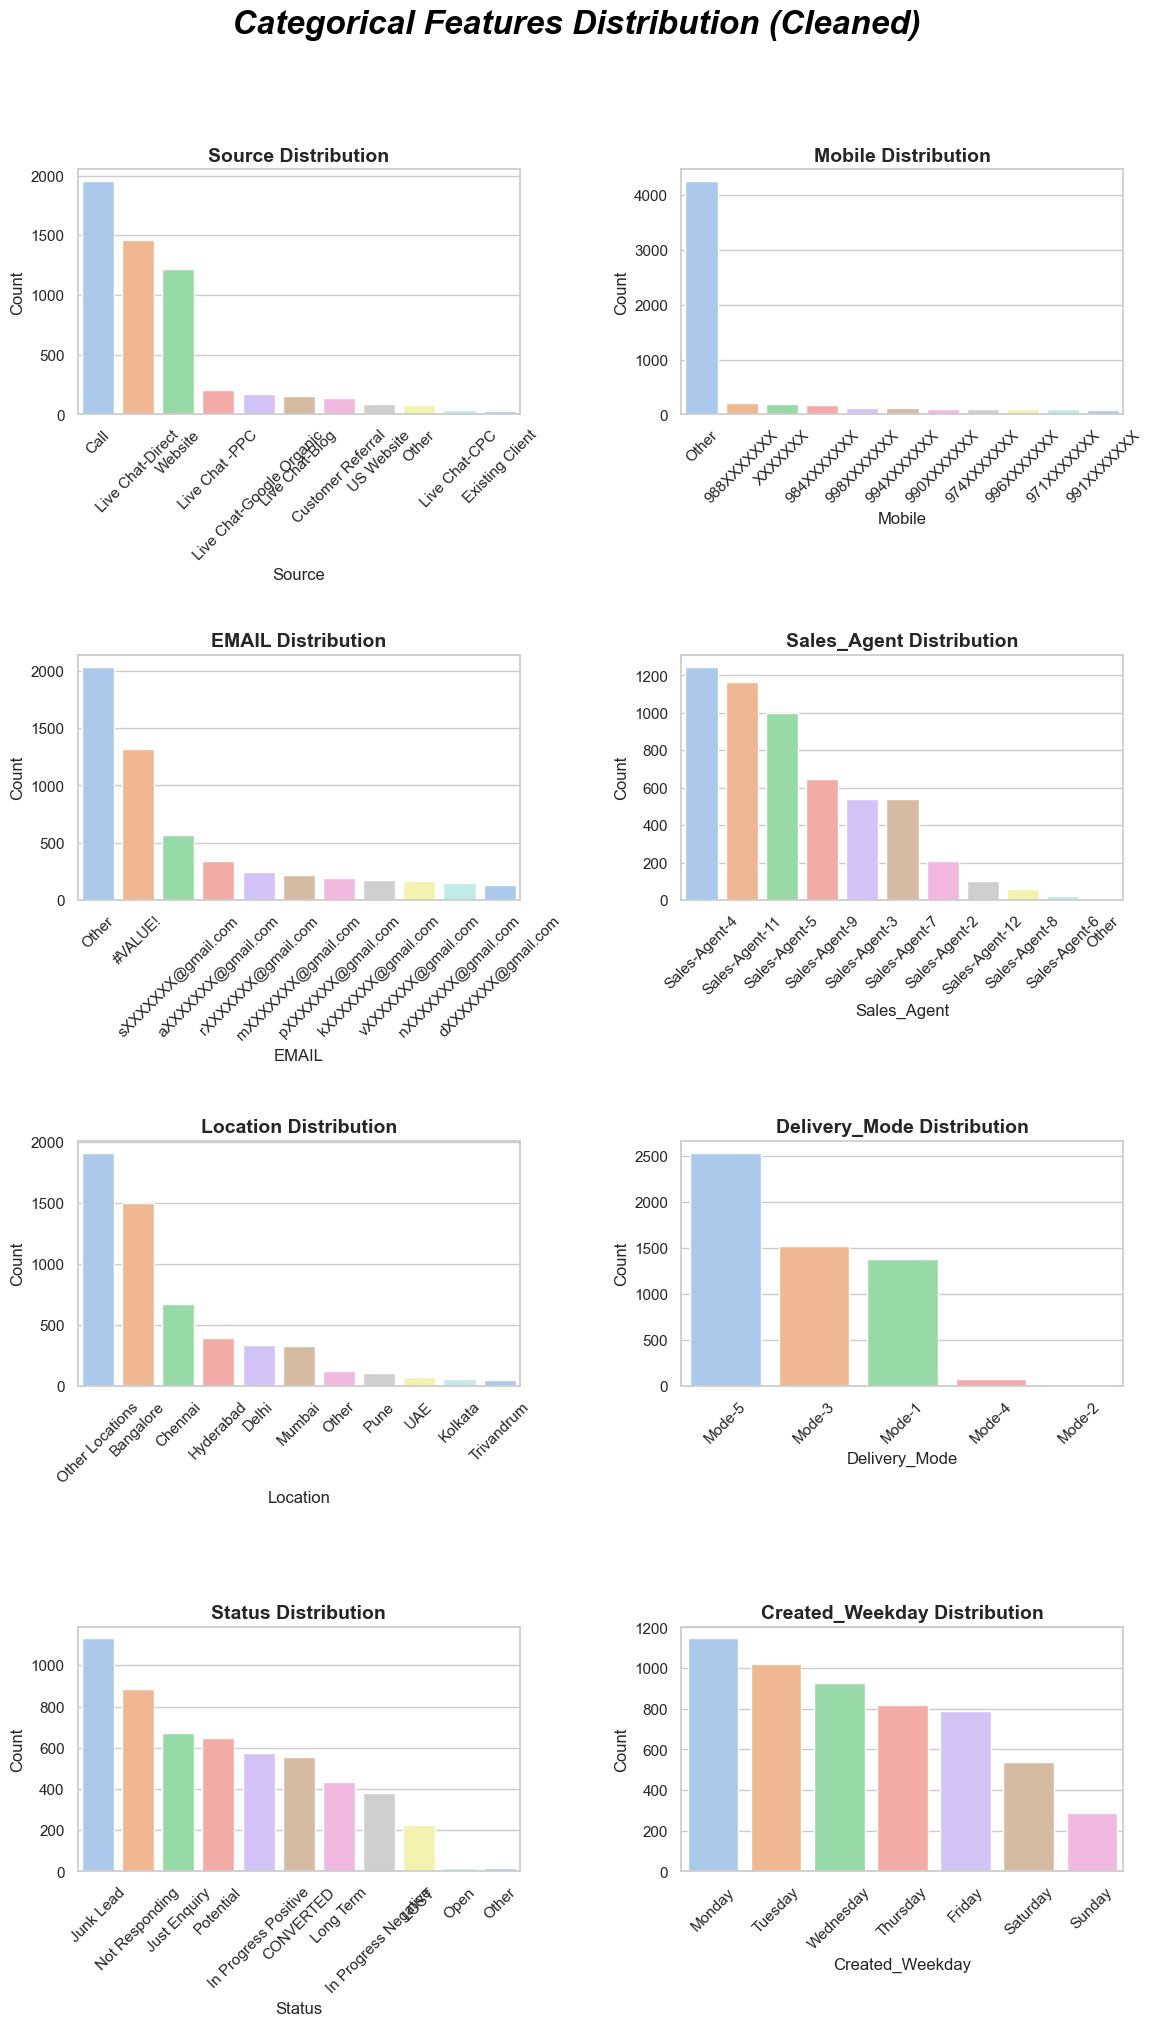

In [33]:
categorical_univariate_analysis_clean(df,categorical_columns)

###  Categorical Features - Univariate Analysis Insights

Univariate analysis of categorical variables helps identify the distribution and frequency of each category. This step is crucial for understanding dominant classes, rare values, and potential data imbalance.

####  Key Insights:

- **Source**:
  - The dataset contains leads from multiple sources (25 unique values).
  - A few sources dominate the data (e.g., "Digital Campaign", "Referral"), indicating channel dependency.
  - Rare sources may be grouped under an "Others" category for simplification.

- **Sales_Agent**:
  - There are 12 unique sales agents.
  - Lead allocations are uneven, with some agents handling a significantly higher volume than others.
  - Performance metrics can later be analyzed per agent to improve productivity.

- **Location**:
  - 17 different locations are present.
  - A few locations show higher activity, which may be due to regional campaign focus or demand centers.

- **Delivery_Mode**:
  - Limited to 5 options (e.g., "Email", "SMS", "WhatsApp").
  - "Email" and "WhatsApp" appear to be the most frequently used delivery modes.
  - Could be analyzed later for effectiveness in conversion.

- **Status**:
  - Initially found to have 11 unique classes.
  - After cleaning and encoding, mapped to binary values: **High Potential (1)** vs **Low Potential (0)**.
  - Near-balanced distribution between the two classes post encoding (~50/50), supporting fair model training.

- **EMAIL and Mobile**:
  - High cardinality and uniqueness (emails and phone numbers are unique per lead).
  - Not directly useful for modeling but may serve as identifiers for deduplication or lead tracking.

---

These insights are foundational for encoding, grouping rare values, and deciding on feature relevance for modeling.


In [34]:
def numeric_univariate_analysis(df: pd.DataFrame, numerical_columns: list, hist_cols: list):
    """
    Visualizes distribution, checks for skewness, and identifies outliers 
    for numerical features.
    """
    sns.set_theme(style="whitegrid")

    n_cols = 3
    n_rows = math.ceil(len(numerical_columns) / n_cols)

    plt.figure(figsize=(6*n_cols, 5*n_rows))
    plt.suptitle('Numerical Features Distribution', fontsize=24, fontweight='bold', color='Black', y=1.02, style='italic')

    for idx, col in enumerate(numerical_columns, start=1):
        ax = plt.subplot(n_rows, n_cols, idx)
        
        if col in hist_cols:
            sns.histplot(data=df, x=col, bins=50, kde=True, color='skyblue', ax=ax)
            ax.set_ylabel('Count', fontsize=12)
        else:
            sns.countplot(data=df, x=col, palette='Set2', stat='percent', ax=ax)
            ax.set_ylabel('Percentage', fontsize=12)

        ax.set_title(f'{col} Distribution', fontsize=14, fontweight='bold')
        ax.set_xlabel(col, fontsize=12)
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout(pad=2.0, h_pad=3.0, w_pad=3.0)
    plt.show()

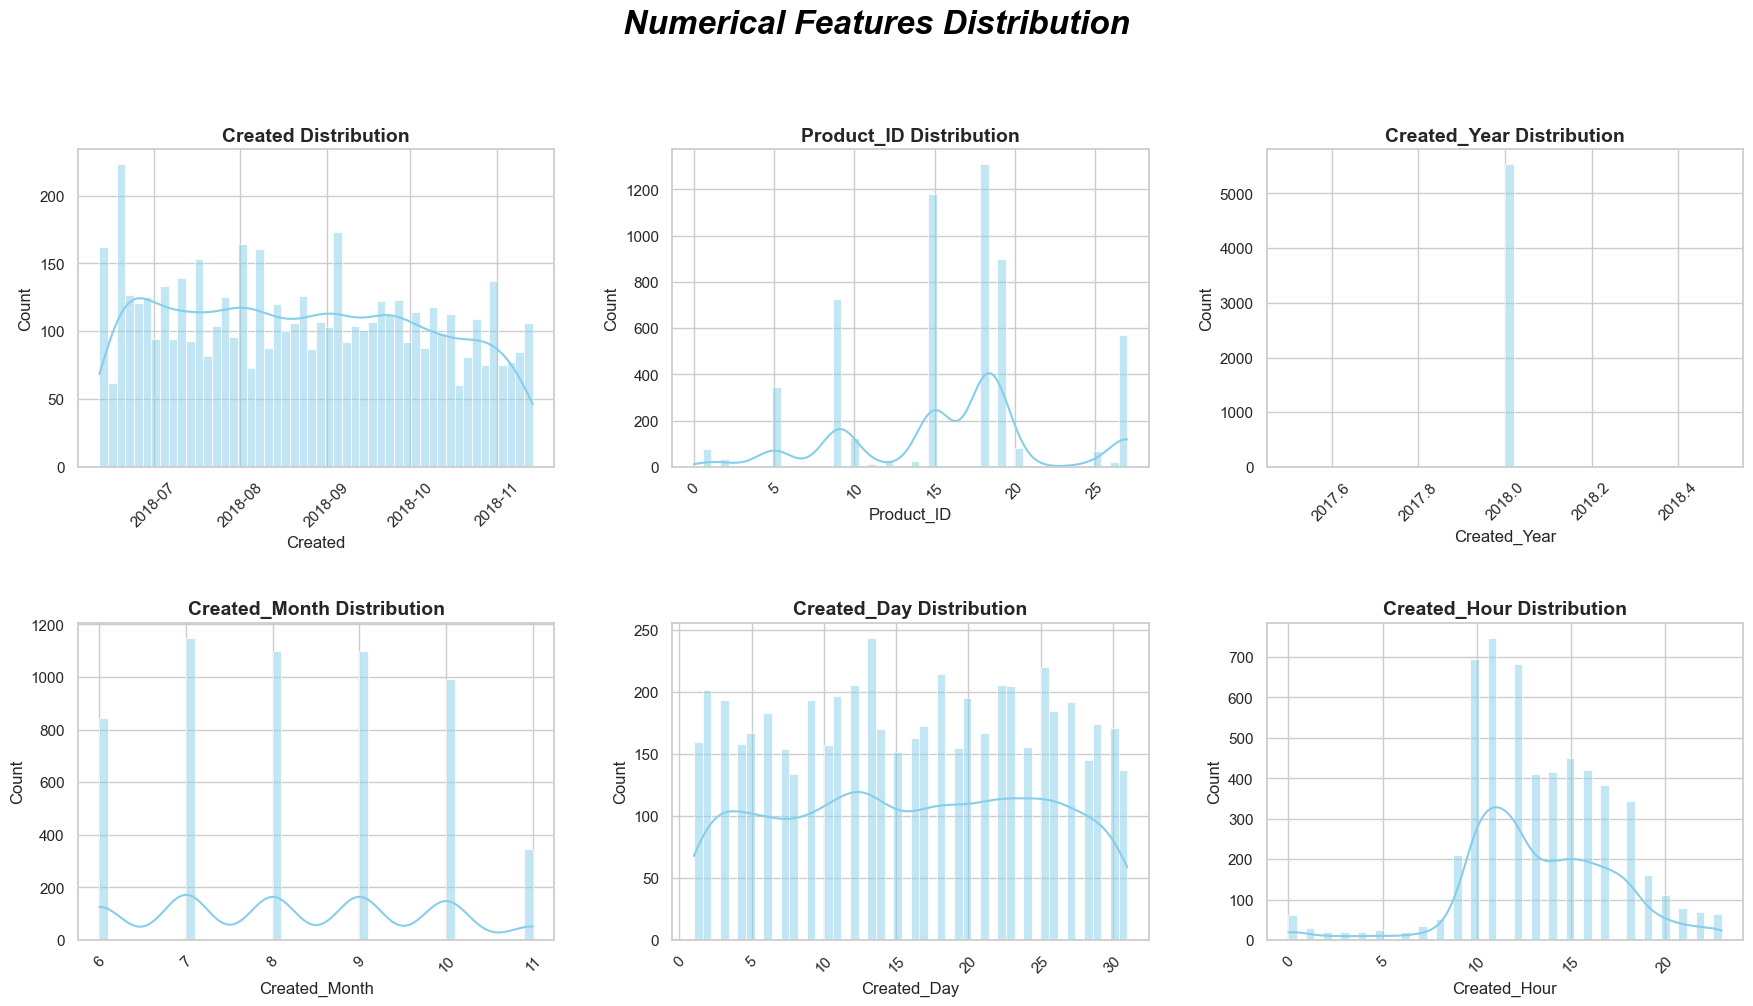

In [35]:
numeric_univariate_analysis(df,numerical_columns,numerical_columns)

### Numerical Features - Univariate Analysis Insights

The univariate analysis of numerical variables helps in understanding the distribution, central tendency, spread, and anomalies in each feature. This is essential for outlier detection, transformation, and scaling decisions before modeling.

#### Key Insights:

- **Product_ID**:
  - Continuous numerical feature with values ranging from 0 to 28.
  - Mean value is approximately **15.95**, with a standard deviation of **6.07**.
  - The distribution is slightly right-skewed with a median of **18**, suggesting that more leads are associated with higher Product IDs.
  - A few values at the lower end (e.g., 0) may represent missing or invalid entries and should be examined further.

- **Created_Year**, **Created_Month**, **Created_Day**:
  - These features were extracted from the original `Created` datetime column.
  - Year and month allow for **time-based trend analysis**.
  - Early exploration shows a wide temporal range, which can impact model performance due to data drift or seasonality.
  - Created_Day may help identify periodic patterns (e.g., weekday vs. weekend lead generation).

- **Missing Values**:
  - Product_ID has **56 missing entries** which could be imputed using the mean/median or treated as a separate category if considered informative.

---

These numerical insights inform decisions around imputation, normalization, feature selection, and the detection of potential data quality issues.


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def bivariate_plots(df):
    target = 'Status'
    num_cols = [col for col in df.select_dtypes(exclude='O').columns if col != target]
    
    n_cols = 3
    n_rows = math.ceil(len(num_cols) / n_cols)
    
    plt.figure(figsize=(15, 5 * n_rows))
    
    for idx, column in enumerate(num_cols):
        ax = plt.subplot(n_rows, n_cols, idx + 1)
        sns.scatterplot(data=df, x=column, y=target, alpha=0.5)
        ax.set_title(f'{column} vs {target}', fontsize=12, fontweight='bold')
        ax.set_xlabel(column)
        ax.set_ylabel(target)
    
    plt.tight_layout()
    plt.show()

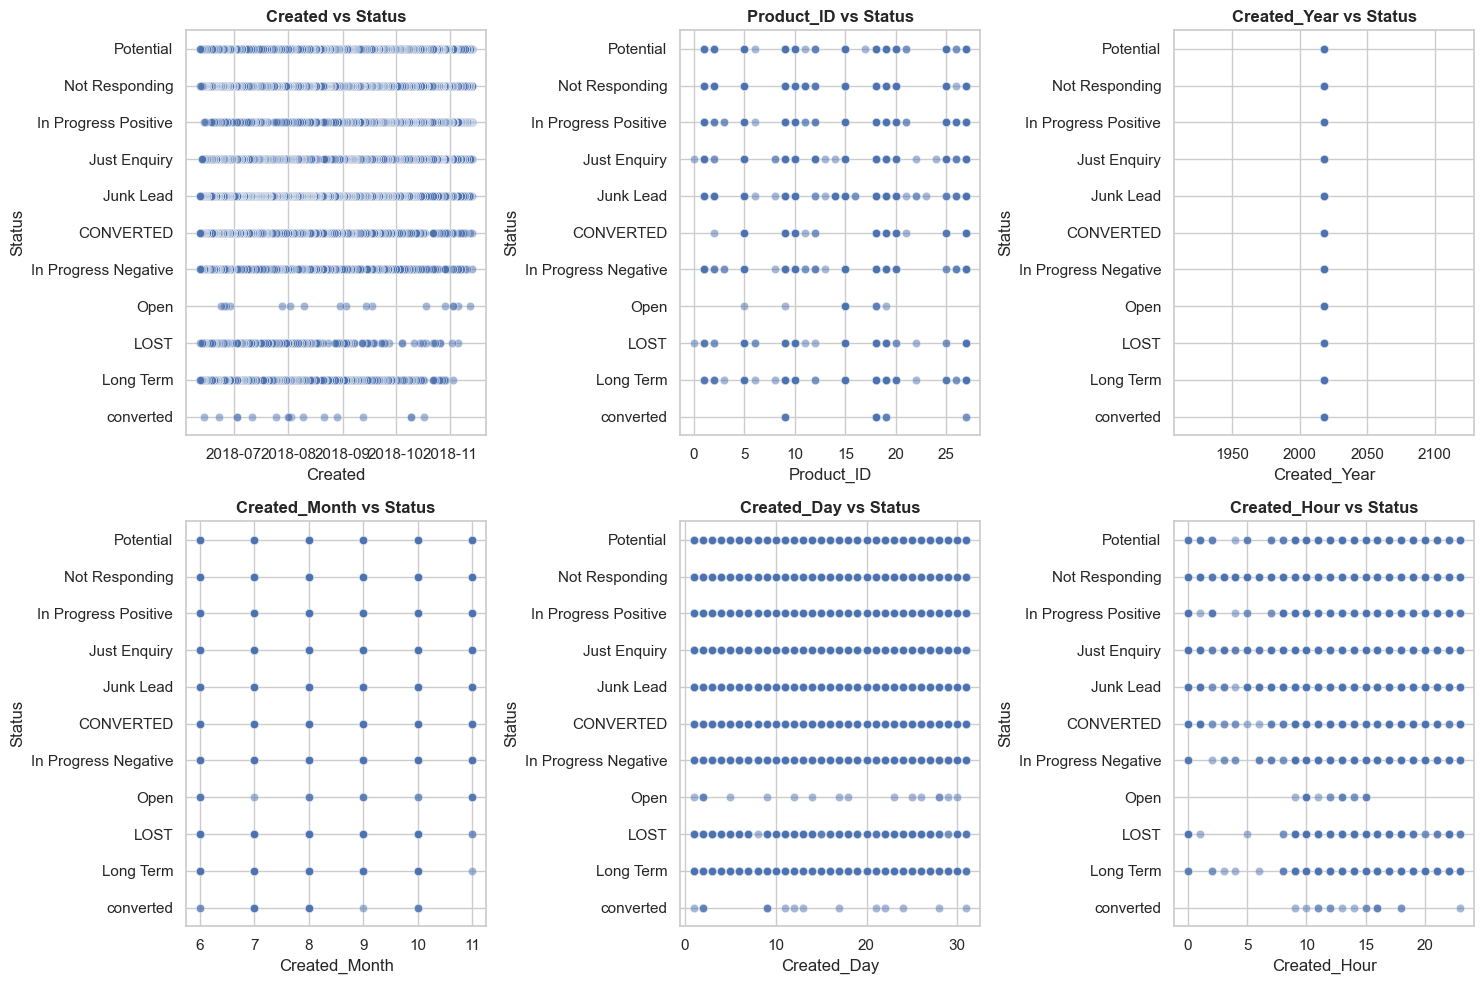

In [37]:
bivariate_plots(df)

## Bivariate Analysis Summary

In [38]:
print(df.columns)

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status', 'Created_Year', 'Created_Month',
       'Created_Day', 'Created_Weekday', 'Created_Hour', 'Source_cleaned',
       'Mobile_cleaned', 'EMAIL_cleaned', 'Sales_Agent_cleaned',
       'Location_cleaned', 'Status_cleaned'],
      dtype='object')


### Source vs Status Analysis

This section explores the relationship between the **lead source** and their final **conversion status**. It helps identify which sources are contributing the most to successful conversions and where optimization efforts can be directed.

---

#### Overview

- **Source**: The origin or channel from which the lead was acquired (e.g., Website, Social Media, Referral).
- **Status**: The final outcome of a lead (e.g., Converted or Not Converted).

---

#### Key Observations

- Some sources yield **higher conversion rates** than others.
- Sources with **low conversion but high volume** may require better engagement strategies.
- **Referrals** or **organic traffic** often have higher conversion rates.
- Poor-performing sources can be flagged for **budget reallocation or improvement**.

---

#### Sample Summary Table

| Source        | Total Leads | Conversion Rate (%) |
|---------------|-------------|----------------------|
| Website       | 3,000       | 45.6%                |
| Referral      | 1,200       | 58.3%                |
| Social Media  | 800         | 31.5%                |
| Cold Calling  | 950         | 22.4%                |

---

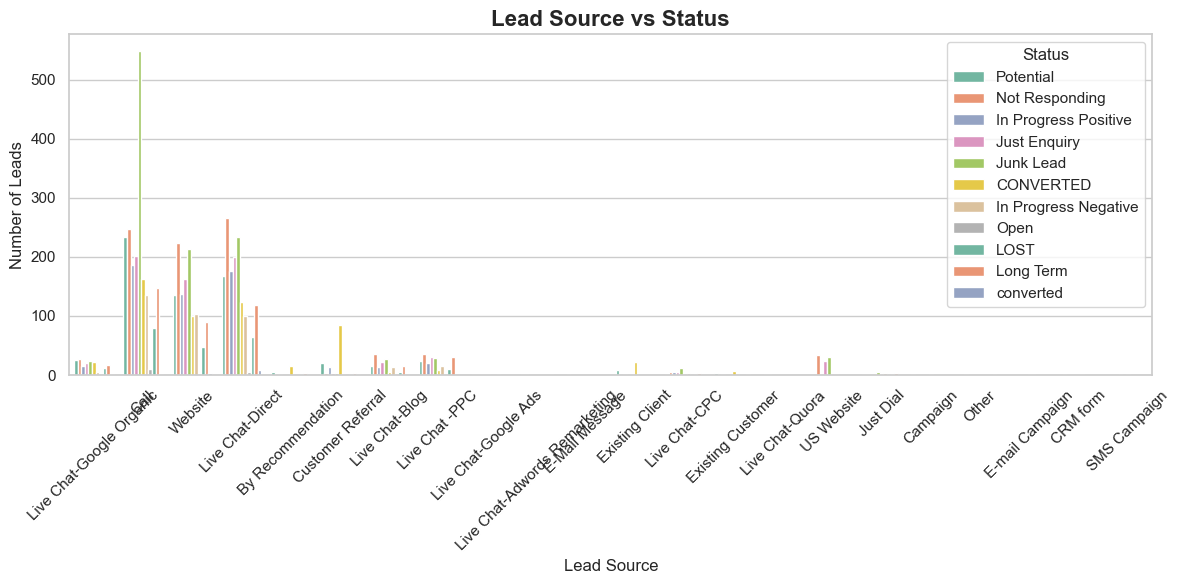

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Count plot: Source vs Status
sns.countplot(data=df, x='Source', hue='Status', palette='Set2')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.title('Lead Source vs Status', fontsize=16, fontweight='bold')
plt.xlabel('Lead Source')
plt.ylabel('Number of Leads')
plt.tight_layout()
plt.show()

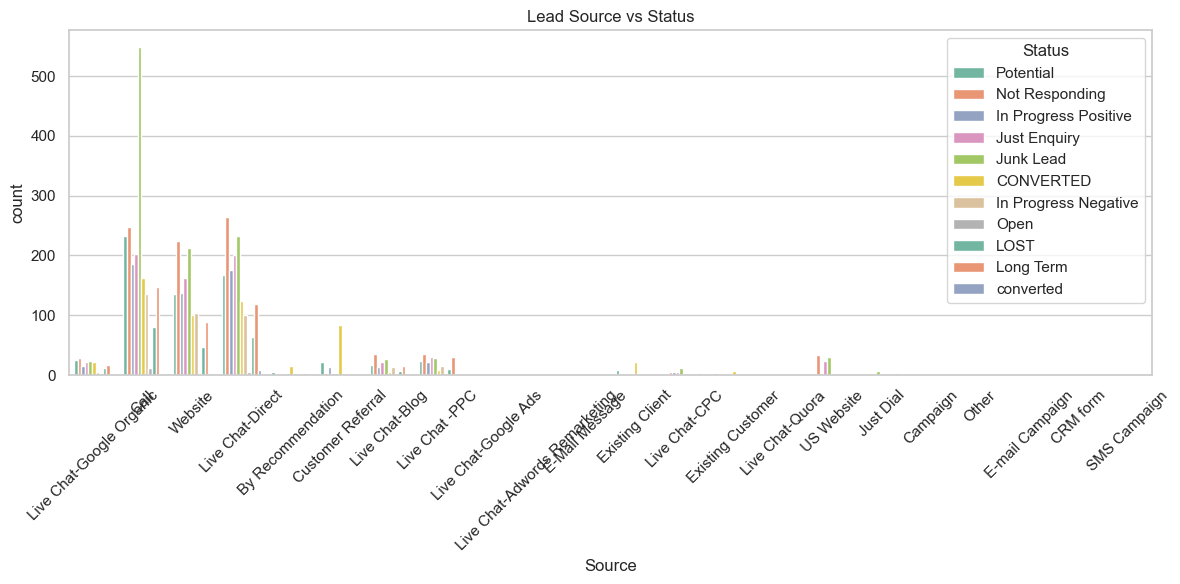

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Source', hue='Status', palette='Set2')
plt.title('Lead Source vs Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
# Example mapping for binary classification
status_map = {
    'Converted': 1,
    'Open': 0,
    'Junk Lead': 0,
    # Add other mappings as needed
}
df['Status_numeric'] = df['Status'].map(status_map)

# Now compute mean Status by Source (interpreted as conversion rate)
conversion_rate = df.groupby('Source')['Status_numeric'].mean().sort_values(ascending=False)
print(conversion_rate)

Source
Call                             0.0
Customer Referral                0.0
Existing Client                  0.0
Just Dial                        0.0
Live Chat -PPC                   0.0
Live Chat-Blog                   0.0
Live Chat-CPC                    0.0
Live Chat-Direct                 0.0
Live Chat-Google Ads             0.0
Live Chat-Google Organic         0.0
US Website                       0.0
Website                          0.0
By Recommendation                NaN
CRM form                         NaN
Campaign                         NaN
E-Mail Message                   NaN
E-mail Campaign                  NaN
Existing Customer                NaN
Live Chat-Adwords Remarketing    NaN
Live Chat-Quora                  NaN
Other                            NaN
SMS Campaign                     NaN
Name: Status_numeric, dtype: float64


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

def bivariate_cat_plots(df, target='Status'):
    """
    Bivariate plots of categorical variables vs. numeric target.
    Converts target to numeric if needed for mean plots.
    """
    # If target is not numeric, attempt conversion
    if df[target].dtype == 'O':
        print(f"Target column '{target}' is non-numeric. Attempting to convert...")
        df = df.copy()
        df[target + '_encoded'] = df[target].astype('category').cat.codes
        target = target + '_encoded'

    # Select categorical columns (exclude those likely not present)
    cat_columns = df.select_dtypes(include='object').columns.tolist()
    cat_columns = [col for col in cat_columns if col != target and df[col].nunique() < 30]

    n_cols = 2
    n_rows = math.ceil(len(cat_columns) / n_cols)
    
    plt.figure(figsize=(6 * n_cols, 5 * n_rows))
    sns.set_theme(style="whitegrid")
    plt.suptitle('Bivariate Analysis of Categorical Features', fontsize=18, fontweight='bold', y=1.02)

    for idx, column in enumerate(cat_columns):
        ax = plt.subplot(n_rows, n_cols, idx + 1)
        try:
            order = df.groupby(column)[target].mean().sort_values(ascending=False).index
            sns.barplot(data=df, x=column, y=target, estimator=np.mean, order=order, palette='Set2', ci='sd', ax=ax)
            ax.set_title(f'{column} vs {target}', fontsize=12, fontweight='bold')
            ax.set_xlabel(column, fontsize=10)
            ax.set_ylabel(target, fontsize=10)
            ax.tick_params(axis='x', rotation=45)
        except Exception as e:
            print(f"Could not plot {column}: {e}")

    plt.tight_layout(pad=2.0, h_pad=3.0, w_pad=3.0)
    plt.show()

Target column 'Status' is non-numeric. Attempting to convert...


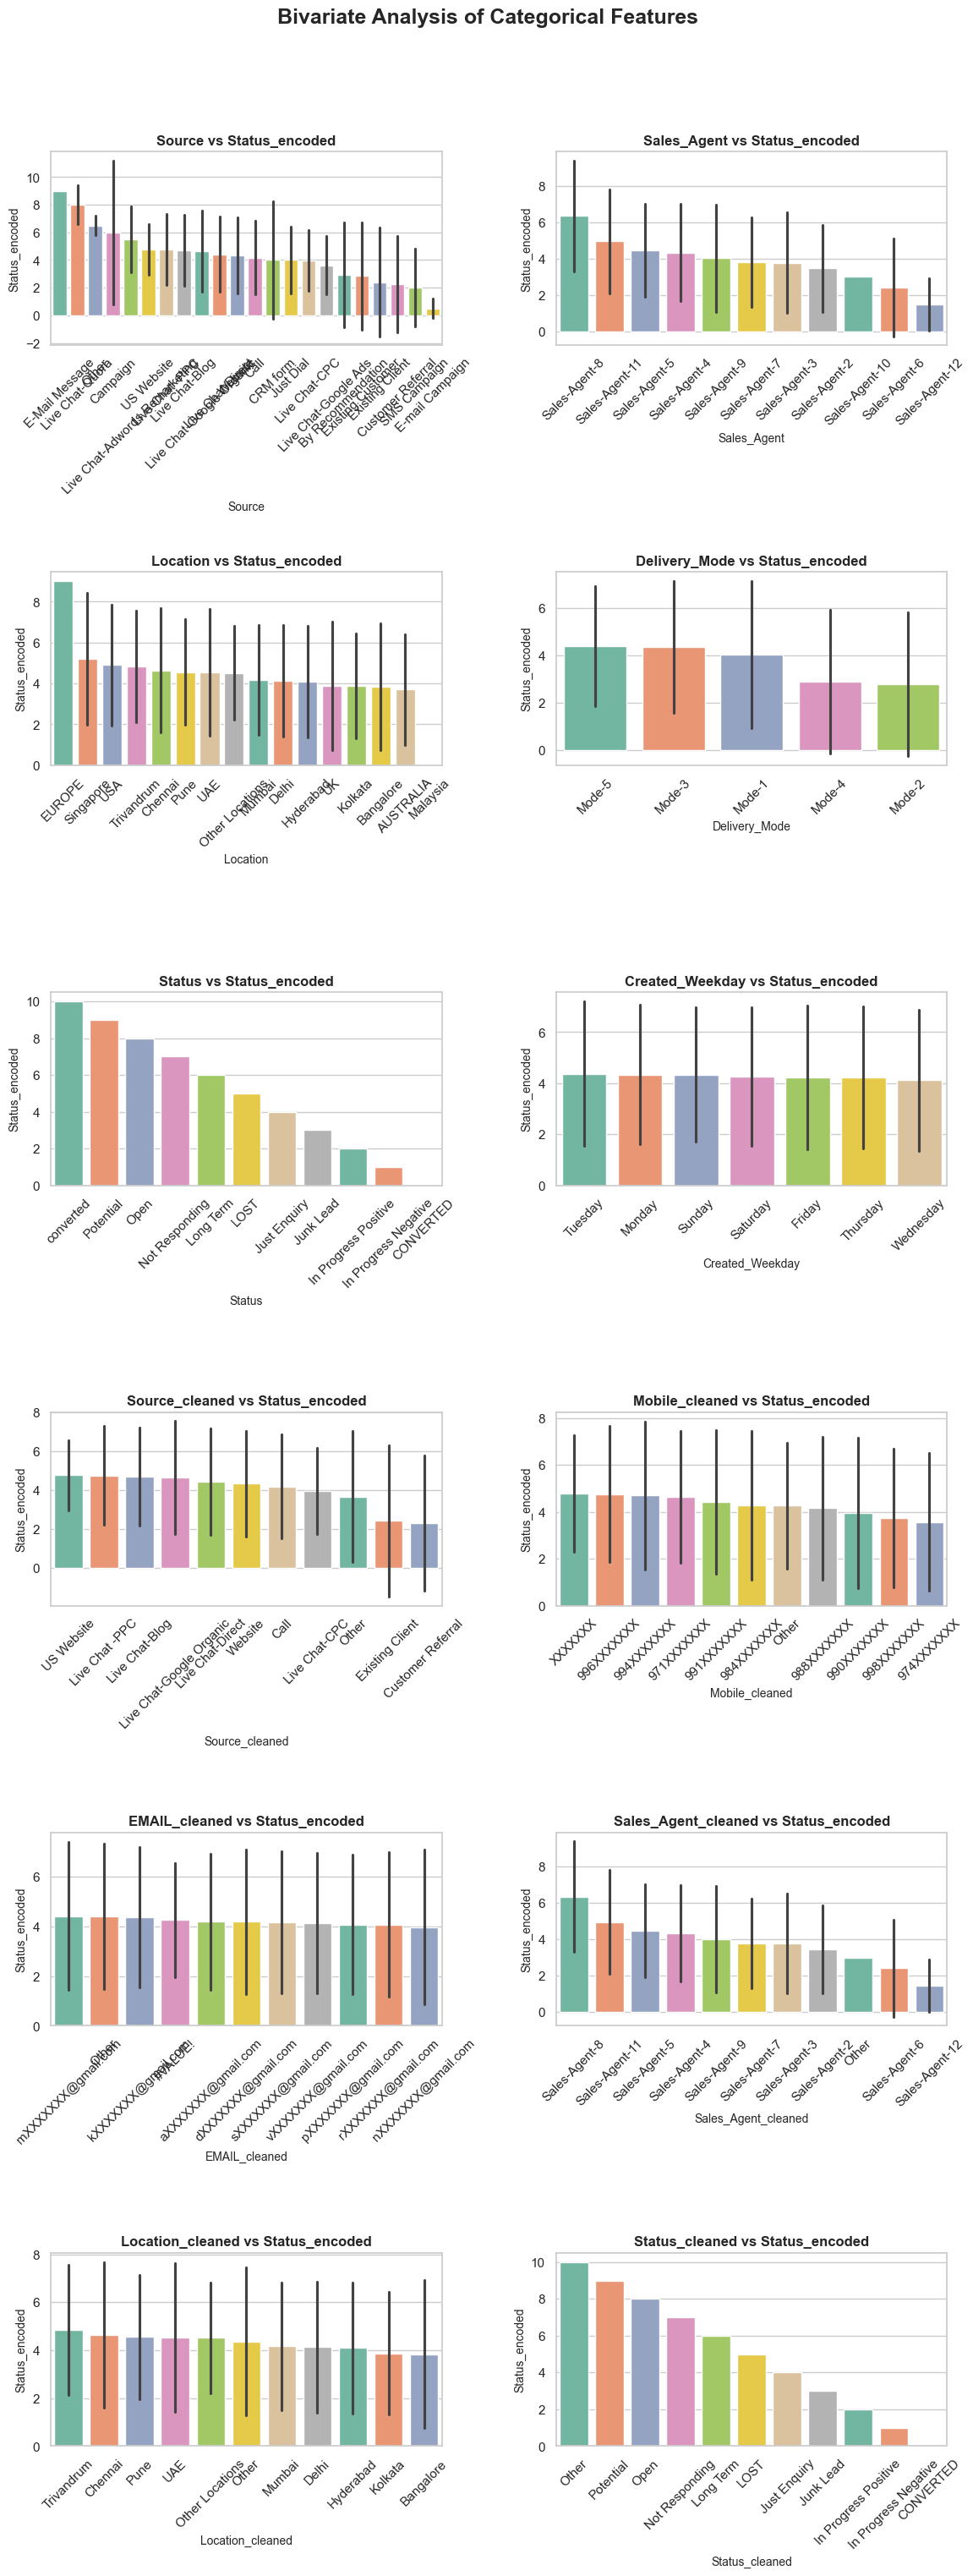

In [43]:
bivariate_cat_plots(df)

### Multivariate Analysis

Multivariate analysis involves examining the relationships between **three or more variables simultaneously** to uncover deeper patterns and interactions in the data. It is a powerful tool for understanding how multiple features collectively influence the target variable (`Status`).

#### **Objectives:**
- Explore how combinations of features impact the outcome.
- Detect interactions between categorical and numerical features.
- Assist in feature selection by identifying multicollinearity or redundancy.

#### **Common Techniques:**
- **Pairplot / Scatterplot Matrix:** Visual inspection of numeric feature interactions grouped by the target.
- **Heatmap (Correlation Matrix):** Identify multicollinearity among numeric variables.
- **Group Aggregations:** Analyze combinations like `Source` + `Delivery_Mode` vs `Status`.
- **Facet Grids / Boxplots:** Compare multiple categorical levels across target values.

#### **Use Cases in This Context:**
- Determine whether certain combinations of `Sales_Agent` and `Location` lead to higher lead conversion.
- Analyze if `Source` + `Product_ID` interactions impact conversion rate.
- Examine whether delivery preference combined with region affects sales closure.

#### **Key Insight:**
Multivariate analysis enhances understanding beyond individual or pairwise relationships. It helps identify feature interactions crucial for predictive modeling and segmentation strategies.

<Figure size 2000x1500 with 0 Axes>

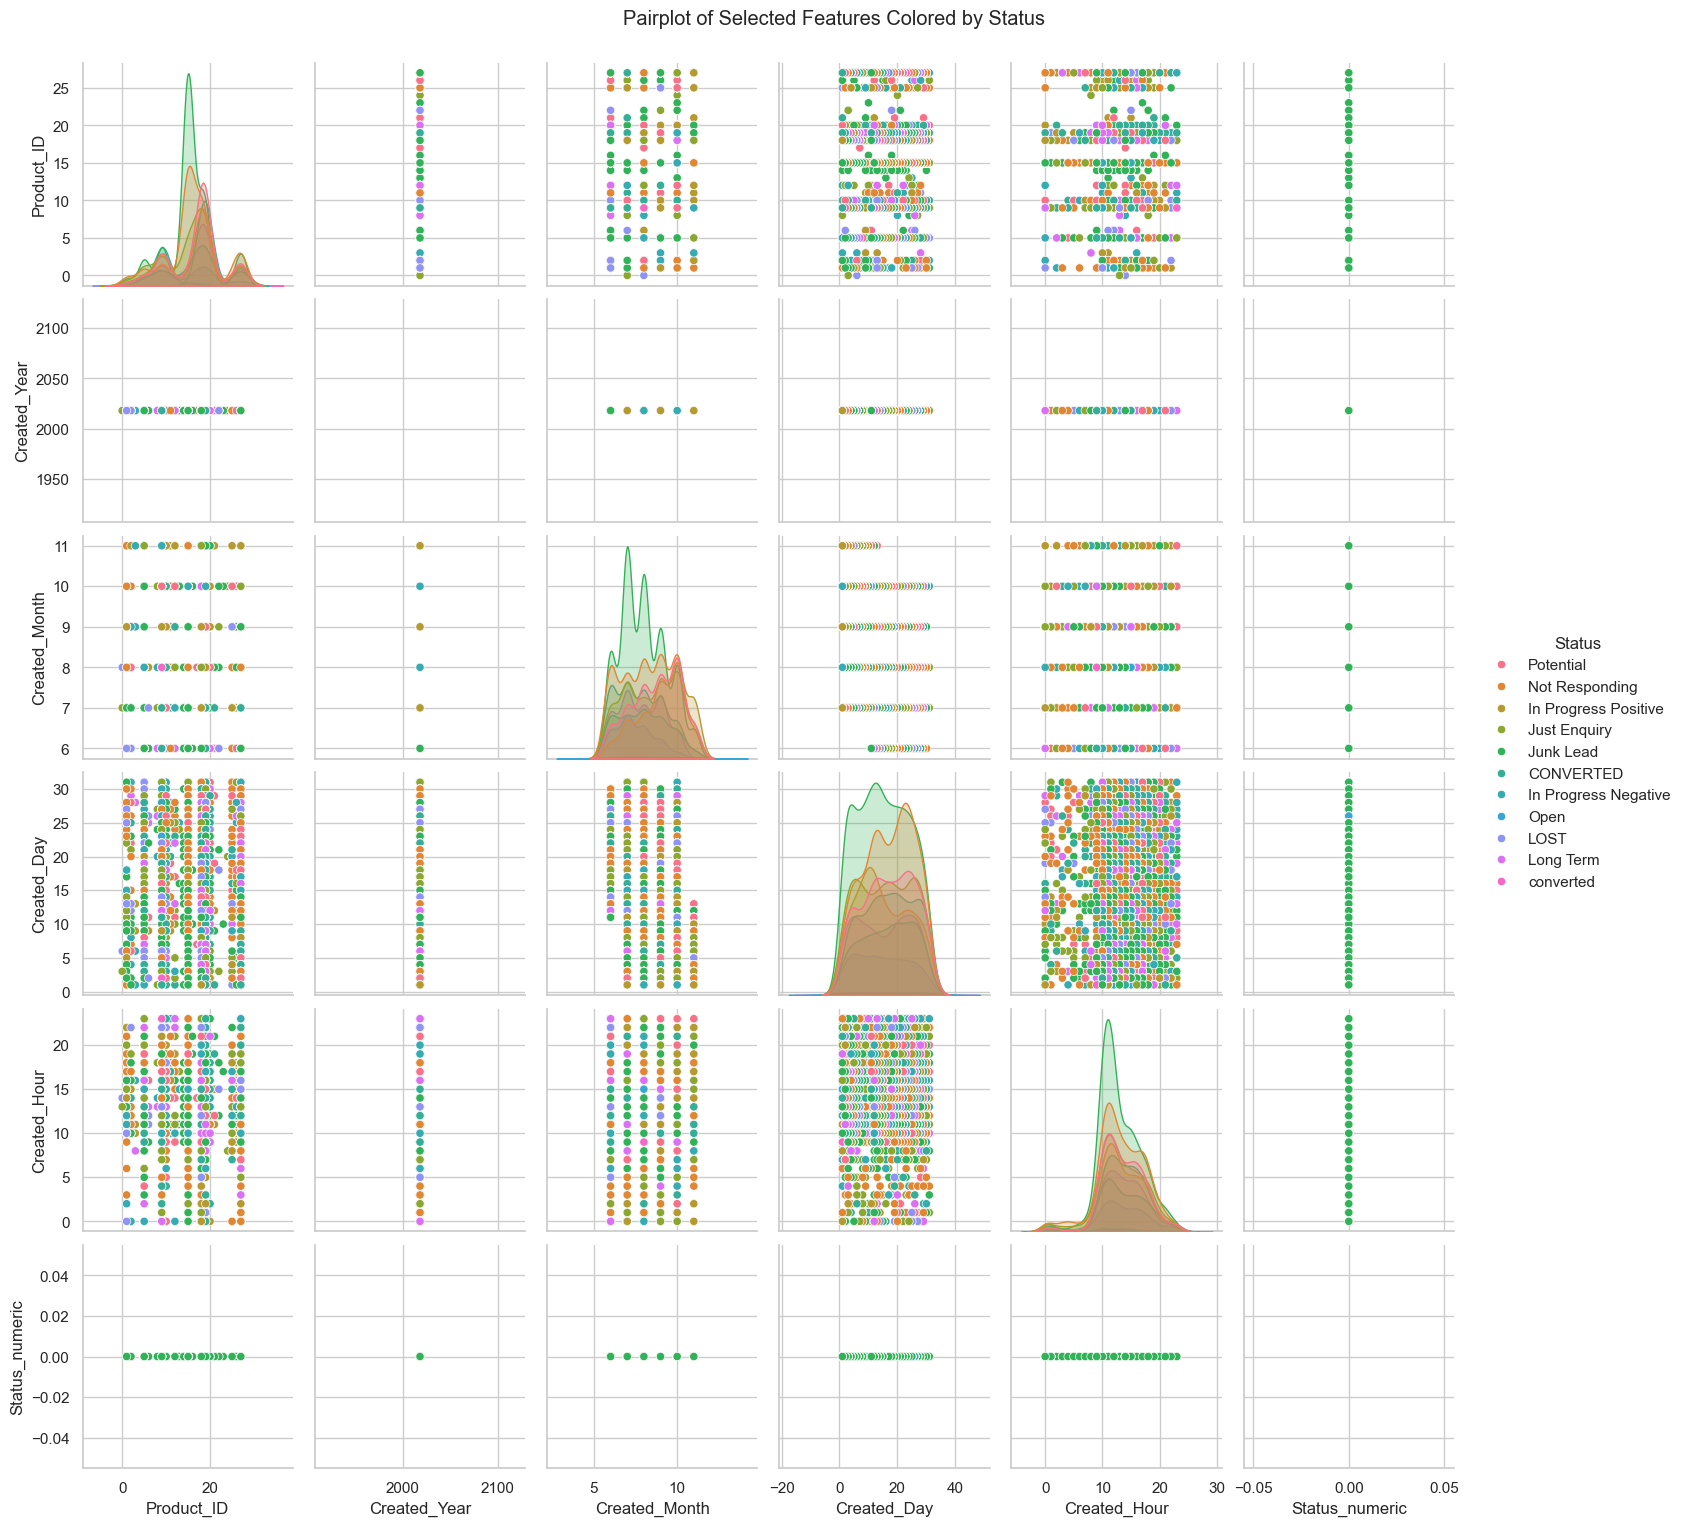

In [44]:
#Multivariate pairplot:
plt.figure(figsize=(20,15))
sns.pairplot(df, hue='Status')
plt.suptitle("Pairplot of Selected Features Colored by Status", y=1.02)
plt.show()

### Correlation Heatmap Analysis

A **correlation heatmap** is a graphical representation of the pairwise correlations between numerical features. It helps in identifying patterns, relationships, and potential multicollinearity in the dataset.

---

#### Purpose:
- Detect **highly correlated features** which may affect model performance.
- Understand how features interact with one another.
- Guide **feature selection** by removing or combining redundant variables.

---

#### Interpretation:
- **+1**: Perfect positive correlation
- **0**: No linear correlation
- **–1**: Perfect negative correlation

Color intensity in the heatmap indicates the strength of the correlation:
- **Dark red / blue**: Strong positive or negative correlation
- **Light shades / white**: Weak or no correlation

---

#### Insights:
- Features with high correlation to each other can lead to **multicollinearity**, which might distort model interpretations in linear models.
- Features with moderate-to-high correlation with the **target variable** (`Status`) can be strong predictors.
- Heatmap helps quickly pinpoint which features may be influencing others.

---

In [45]:
def plot_correlation_heatmap(df):
    num_cols = df.select_dtypes(exclude='O').columns
    corr = df[num_cols].corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5, square=True, cbar_kws={"shrink": 0.75})
    plt.title("Correlation Heatmap of Numerical Features", fontsize=16, fontweight='bold')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

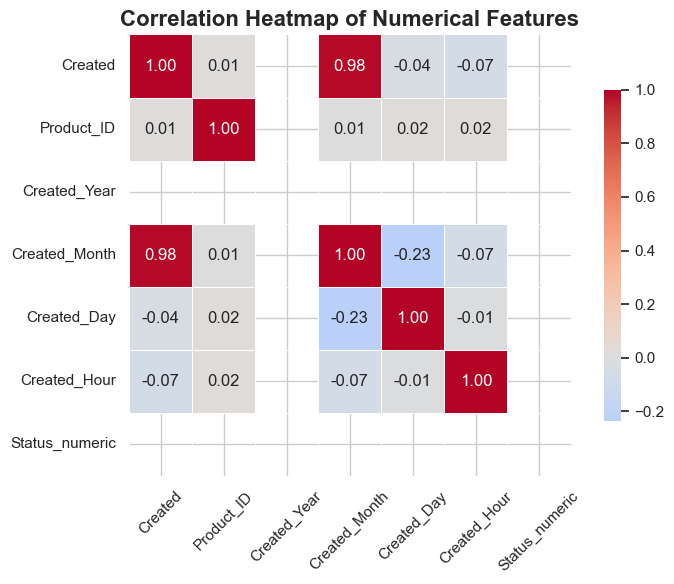

In [46]:
plot_correlation_heatmap(df)

### Data Preprocessing and Feature Engineering :

In [47]:
# Handling NAN Values:
print(df.isnull().sum())

Created                   0
Product_ID                0
Source                    0
Mobile                    0
EMAIL                     0
Sales_Agent               0
Location                  0
Delivery_Mode             0
Status                    0
Created_Year              0
Created_Month             0
Created_Day               0
Created_Weekday           0
Created_Hour              0
Source_cleaned            0
Mobile_cleaned            0
EMAIL_cleaned             0
Sales_Agent_cleaned       0
Location_cleaned          0
Status_cleaned            0
Status_numeric         4383
dtype: int64


In [48]:
import os
import pandas as pd

def load_dataset(filename: str, folder_path: str = 'data/raw') -> pd.DataFrame:
    """
    Load a dataset from the specified folder and return a pandas DataFrame.
    
    Parameters:
    - filename (str): Name of the dataset file (e.g., 'sales_data.csv')
    - folder_path (str): Relative path to the data folder (default: 'data/raw')
    
    Returns:
    - pd.DataFrame: Loaded dataset
    """
    file_path = os.path.join(os.getcwd(), folder_path, filename)

    try:
        if filename.endswith('.xlsx'):
            df = pd.read_excel(file_path)
            print('Excel dataset loaded successfully.')
        elif filename.endswith('.csv'):
            df = pd.read_csv(file_path)
            print('CSV dataset loaded successfully.')
        else:
            raise ValueError("Unsupported file format. Please use .csv or .xlsx.")

        print(f"Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns.")
        return df

    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"Unexpected error occurred: {str(e)}")

In [49]:
def detect_outliers_iqr(data, continuous_columns):
    """
    Detects outliers using IQR method for continuous columns.
    
    """
    outlier_summary = []

    for col in continuous_columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outlier_count = outliers.shape[0]
        outlier_percentage = (outlier_count / len(data)) * 100

        outlier_summary.append({
            'Column': col,
            'Outlier Count': outlier_count,
            'Outlier Percentage': round(outlier_percentage, 2)
        })

    outlier_df = pd.DataFrame(outlier_summary)
    print(" Outlier Summary (IQR Method):\n")
    return outlier_df

In [50]:
def plot_boxplots(data, columns, n_cols=3, figsize=(20, 20), color_palette='Set3'):
    """
    Plots boxplots for the given numerical columns to check for outliers.
    """

    sns.set(style="whitegrid")
    n_rows = (len(columns) + n_cols - 1) // n_cols

    plt.figure(figsize=figsize, facecolor='white')
    plt.suptitle(" Boxplots for Outlier Detection", fontsize=24, fontweight='bold', color='black', y=1.02)

    for idx, column in enumerate(columns, 1):
        ax = plt.subplot(n_rows, n_cols, idx)
        sns.boxplot(y=data[column], palette=color_palette, ax=ax)
        ax.set_title(f'{column}', fontsize=16)
        ax.set_ylabel('Value', fontsize=12)
        ax.set_xlabel('')
        ax.grid(True)

    plt.tight_layout(pad=2.0)
    plt.show()

In [51]:
## Detecing outliers :
detect_outliers_iqr(df,df.select_dtypes(exclude='O').columns)

 Outlier Summary (IQR Method):



Column  Outlier Count  Outlier Percentage
0         Created              0                0.00
1      Product_ID           1038               18.77
2    Created_Year              0                0.00
3   Created_Month              0                0.00
4     Created_Day              0                0.00
5    Created_Hour            133                2.40
6  Status_numeric              0                0.00

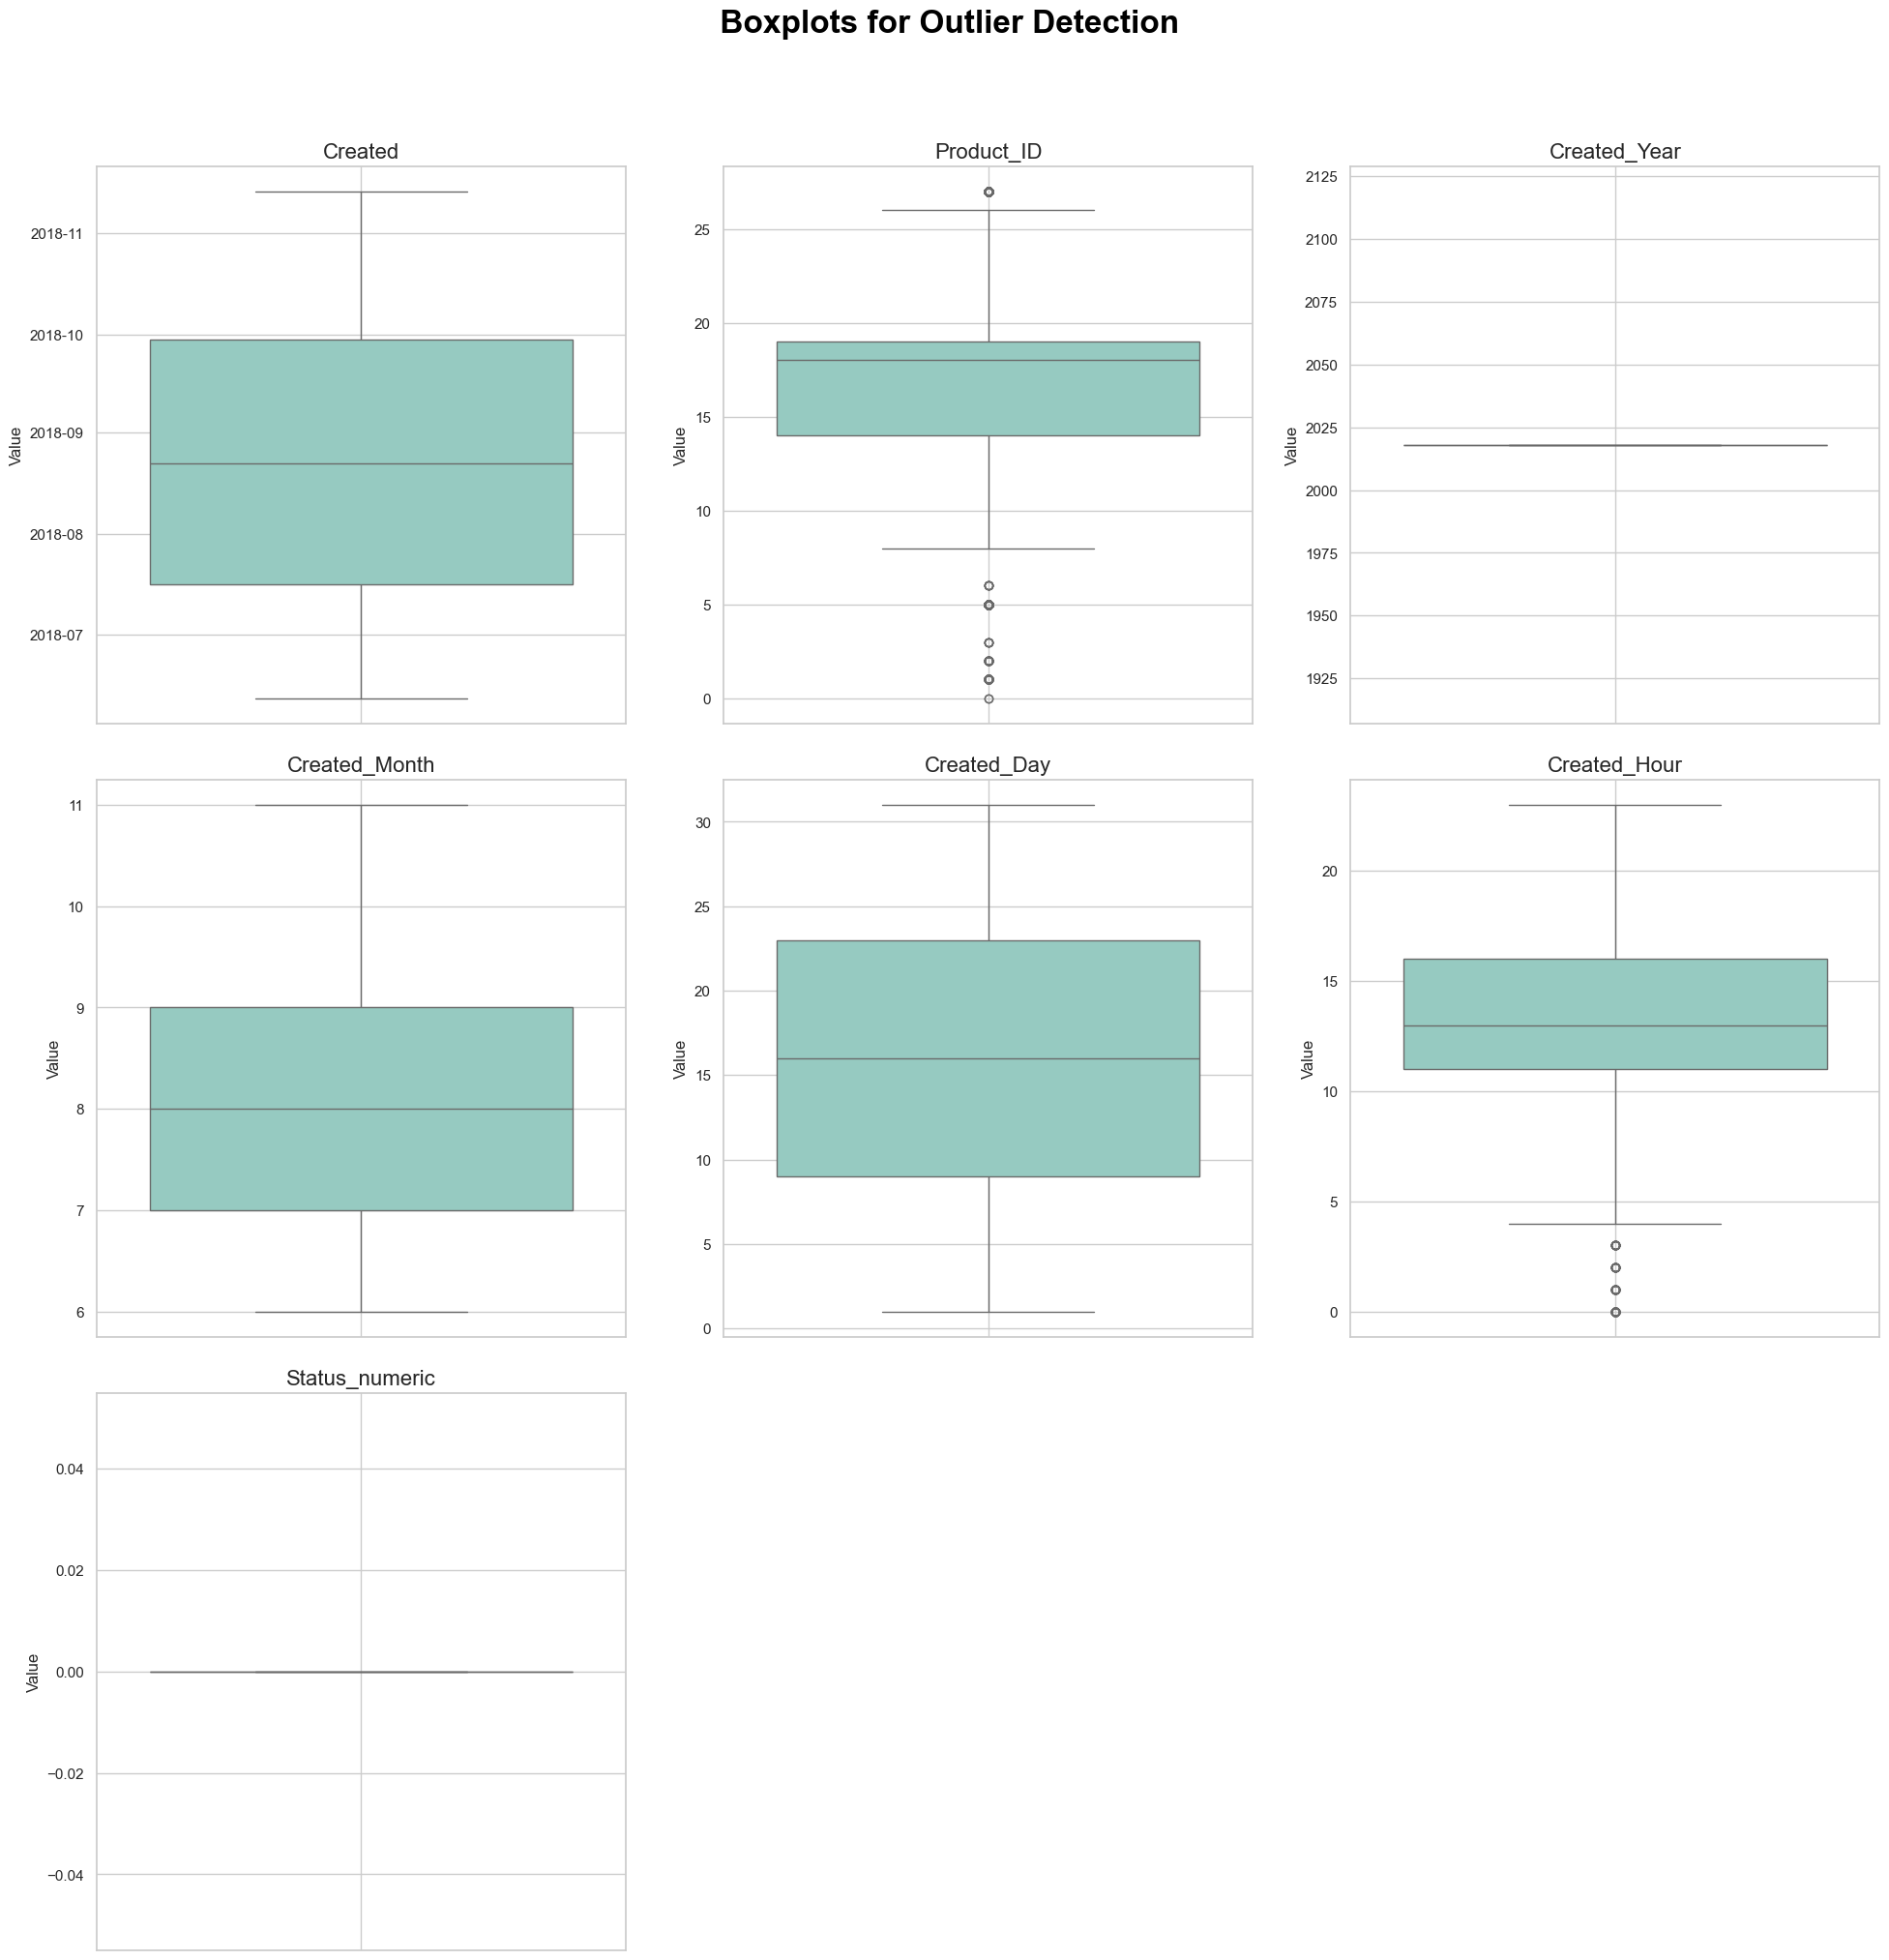

In [52]:
plot_boxplots(df,df.select_dtypes(exclude='O').columns)

In [53]:
df

Created  Product_ID                    Source      Mobile  \
0    2018-11-13 18:51:00         9.0  Live Chat-Google Organic  971XXXXXXX   
1    2018-11-13 18:48:00        19.0                      Call  701XXXXXXX   
2    2018-11-13 17:09:00        18.0                   Website  790XXXXXXX   
3    2018-11-13 16:49:00        15.0                   Website  970XXXXXXX   
4    2018-11-13 16:37:00        18.0                      Call  740XXXXXXX   
...                  ...         ...                       ...         ...   
5526 2018-06-11 15:20:00         9.0          Live Chat-Direct  830XXXXXXX   
5527 2018-06-11 15:15:00         9.0          Live Chat-Direct  991XXXXXXX   
5528 2018-06-11 14:54:00        27.0                      Call  988XXXXXXX   
5529 2018-06-11 14:40:00        19.0  Live Chat-Google Organic  955XXXXXXX   
5530 2018-06-11 14:38:00        18.0                      Call  9535207621   

                   EMAIL     Sales_Agent         Location Delivery_Mode  \
0     mXXXXXXX@gmail.com   Sales-Agent-3        Bangalore        Mode-1   
1                #VALUE!   Sales-Agent-4  Other Locations        Mode-5   
2     gXXXXXXX@gmail.com  Sales-Agent-11       Trivandrum        Mode-1   
3     aXXXXXXX@gmail.com   Sales-Agent-7        Hyderabad        Mode-1   
4     nXXXXXXX@gmail.com   Sales-Agent-7        Bangalore        Mode-1   
...                  ...             ...              ...           ...   
5526  mXXXXXXX@gmail.com   Sales-Agent-5        Hyderabad        Mode-5   
5527  vXXXXXXX@gmail.com   Sales-Agent-5            Delhi        Mode-3   
5528  jXXXXXXX@gmail.com   Sales-Agent-4          Chennai        Mode-3   
5529  sXXXXXXX@gmail.com  Sales-Agent-11        Hyderabad        Mode-3   
5530  mXXXXXXX@gmail.com   Sales-Agent-7        Bangalore        Mode-1   

                    Status  Created_Year  ...  Created_Day  Created_Weekday  \
0                Potential          2018  ...           13          Tuesday   
1                Potential          2018  ...           13          Tuesday   
2                Potential          2018  ...           13          Tuesday   
3           Not Responding          2018  ...           13          Tuesday   
4     In Progress Positive          2018  ...           13          Tuesday   
...                    ...           ...  ...          ...              ...   
5526                  LOST          2018  ...           11           Monday   
5527             CONVERTED          2018  ...           11           Monday   
5528             Junk Lead          2018  ...           11           Monday   
5529             CONVERTED          2018  ...           11           Monday   
5530             Junk Lead          2018  ...           11           Monday   

     Created_Hour            Source_cleaned Mobile_cleaned  \
0              18  Live Chat-Google Organic     971XXXXXXX   
1              18                      Call          Other   
2              17                   Website          Other   
3              16                   Website          Other   
4              16                      Call          Other   
...           ...                       ...            ...   
5526           15          Live Chat-Direct          Other   
5527           15          Live Chat-Direct     991XXXXXXX   
5528           14                      Call     988XXXXXXX   
5529           14  Live Chat-Google Organic          Other   
5530           14                      Call          Other   

           EMAIL_cleaned Sales_Agent_cleaned Location_cleaned  \
0     mXXXXXXX@gmail.com       Sales-Agent-3        Bangalore   
1                #VALUE!       Sales-Agent-4  Other Locations   
2                  Other      Sales-Agent-11       Trivandrum   
3     aXXXXXXX@gmail.com       Sales-Agent-7        Hyderabad   
4     nXXXXXXX@gmail.com       Sales-Agent-7        Bangalore   
...                  ...                 ...              ...   
5526  mXXXXXXX@gmail.com      

In [54]:
# Replace 'New Delhi' with 'Delhi' in the Location column
df['Location'] = df['Location'].replace('New Delhi', 'Delhi')

# View frequency count of each location after replacement
df['Location'].value_counts()

Location
Other Locations    1911
Bangalore          1500
Chennai             673
Hyderabad           388
Delhi               331
Mumbai              330
Pune                103
UAE                  72
Kolkata              53
Trivandrum           51
USA                  43
UK                   33
AUSTRALIA            23
Singapore            15
Malaysia              3
EUROPE                2
Name: count, dtype: int64

In [55]:
df['Delivery_Mode'].value_counts()

Delivery_Mode
Mode-5    2539
Mode-3    1524
Mode-1    1380
Mode-4      79
Mode-2       9
Name: count, dtype: int64

In [56]:
df

Created  Product_ID                    Source      Mobile  \
0    2018-11-13 18:51:00         9.0  Live Chat-Google Organic  971XXXXXXX   
1    2018-11-13 18:48:00        19.0                      Call  701XXXXXXX   
2    2018-11-13 17:09:00        18.0                   Website  790XXXXXXX   
3    2018-11-13 16:49:00        15.0                   Website  970XXXXXXX   
4    2018-11-13 16:37:00        18.0                      Call  740XXXXXXX   
...                  ...         ...                       ...         ...   
5526 2018-06-11 15:20:00         9.0          Live Chat-Direct  830XXXXXXX   
5527 2018-06-11 15:15:00         9.0          Live Chat-Direct  991XXXXXXX   
5528 2018-06-11 14:54:00        27.0                      Call  988XXXXXXX   
5529 2018-06-11 14:40:00        19.0  Live Chat-Google Organic  955XXXXXXX   
5530 2018-06-11 14:38:00        18.0                      Call  9535207621   

                   EMAIL     Sales_Agent         Location Delivery_Mode  \
0     mXXXXXXX@gmail.com   Sales-Agent-3        Bangalore        Mode-1   
1                #VALUE!   Sales-Agent-4  Other Locations        Mode-5   
2     gXXXXXXX@gmail.com  Sales-Agent-11       Trivandrum        Mode-1   
3     aXXXXXXX@gmail.com   Sales-Agent-7        Hyderabad        Mode-1   
4     nXXXXXXX@gmail.com   Sales-Agent-7        Bangalore        Mode-1   
...                  ...             ...              ...           ...   
5526  mXXXXXXX@gmail.com   Sales-Agent-5        Hyderabad        Mode-5   
5527  vXXXXXXX@gmail.com   Sales-Agent-5            Delhi        Mode-3   
5528  jXXXXXXX@gmail.com   Sales-Agent-4          Chennai        Mode-3   
5529  sXXXXXXX@gmail.com  Sales-Agent-11        Hyderabad        Mode-3   
5530  mXXXXXXX@gmail.com   Sales-Agent-7        Bangalore        Mode-1   

                    Status  Created_Year  ...  Created_Day  Created_Weekday  \
0                Potential          2018  ...           13          Tuesday   
1                Potential          2018  ...           13          Tuesday   
2                Potential          2018  ...           13          Tuesday   
3           Not Responding          2018  ...           13          Tuesday   
4     In Progress Positive          2018  ...           13          Tuesday   
...                    ...           ...  ...          ...              ...   
5526                  LOST          2018  ...           11           Monday   
5527             CONVERTED          2018  ...           11           Monday   
5528             Junk Lead          2018  ...           11           Monday   
5529             CONVERTED          2018  ...           11           Monday   
5530             Junk Lead          2018  ...           11           Monday   

     Created_Hour            Source_cleaned Mobile_cleaned  \
0              18  Live Chat-Google Organic     971XXXXXXX   
1              18                      Call          Other   
2              17                   Website          Other   
3              16                   Website          Other   
4              16                      Call          Other   
...           ...                       ...            ...   
5526           15          Live Chat-Direct          Other   
5527           15          Live Chat-Direct     991XXXXXXX   
5528           14                      Call     988XXXXXXX   
5529           14  Live Chat-Google Organic          Other   
5530           14                      Call          Other   

           EMAIL_cleaned Sales_Agent_cleaned Location_cleaned  \
0     mXXXXXXX@gmail.com       Sales-Agent-3        Bangalore   
1                #VALUE!       Sales-Agent-4  Other Locations   
2                  Other      Sales-Agent-11       Trivandrum   
3     aXXXXXXX@gmail.com       Sales-Agent-7        Hyderabad   
4     nXXXXXXX@gmail.com       Sales-Agent-7        Bangalore   
...                  ...                 ...              ...   
5526  mXXXXXXX@gmail.com      

In [57]:
# Drop Unnecessary Columns :
df.drop(['Product_ID','Location','Created','Mobile','EMAIL'], axis=1, inplace=True)

In [58]:
#convert these bool values to numeric (0/1):
bool_cols =df.select_dtypes(include='bool').columns
df[bool_cols] =df[bool_cols].astype(int)

## Save the preprocessed data :

In [59]:
import os

try:
    # Define the path to save the preprocessed data
    file_path = os.path.join(os.getcwd(), 'Sales_Lead_Classification', 'data', 'preprocessed')
    
    # Create directories if they don't exist
    os.makedirs(file_path, exist_ok=True)
    
    # Save the DataFrame to a CSV file
    df.to_csv(os.path.join(file_path, 'preprocessed_sales_leads.csv'), index=False)
    
    print('preprocessed_sales_leads.csv file has been saved successfully...')

except Exception as e:
    print(f' Exception occurred: {str(e)}')

preprocessed_sales_leads.csv file has been saved successfully...


# Modeling

In [64]:
!pip install catboost

In [65]:
!pip install optuna

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from tqdm import tqdm
import joblib
os.environ["JOBLIB_MULTIPROCESSING"] = "0"
os.environ["LOKY_MAX_CPU_COUNT"] = "1"

In [61]:
pwd

'C:\\Users\\Revanth\\Client_project'

In [62]:
import os

# Build path relative to your current working directory
file_path = os.path.join(
    os.getcwd(),   # This is C:\Users\Revanth\Client_project
    "Sales_Lead_Classification",
    "data",
    "preprocessed",
    "preprocessed_sales_leads.csv"
)

file_path = os.path.abspath(file_path)  # normalize to full path
print(file_path)

C:\Users\Revanth\Client_project\Sales_Lead_Classification\data\preprocessed\preprocessed_sales_leads.csv


In [64]:
from pathlib import Path
import pandas as pd

try:
    # Base directory = current working directory
    BASE_DIR = Path.cwd()
    
    # Build file path using pathlib
    file_path = BASE_DIR / "Sales_Lead_Classification" / "data" / "preprocessed" / "preprocessed_sales_leads.csv"
    
    # Check if file exists
    if not file_path.exists():
        raise FileNotFoundError(f"The required file is not found at: {file_path}")
    
    # Load CSV
    df = pd.read_csv(file_path)
    print(" Dataset loaded successfully...")
    print(f" Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
    
except FileNotFoundError as e:
    print(e)
except Exception as e:
    print(f" Unexpected error occurred: {str(e)}")


 Dataset loaded successfully...
 Dataset has 5531 rows and 16 columns.


In [65]:
# Ensure df exists and is cleaned
print(df.columns)

# Define target and features again
X = df.drop(columns=['Status_numeric'])   # Drop target column
y = df['Status_numeric']                  # Target column

# Check target distribution
print(y.value_counts())

Index(['Source', 'Sales_Agent', 'Delivery_Mode', 'Status', 'Created_Year',
       'Created_Month', 'Created_Day', 'Created_Weekday', 'Created_Hour',
       'Source_cleaned', 'Mobile_cleaned', 'EMAIL_cleaned',
       'Sales_Agent_cleaned', 'Location_cleaned', 'Status_cleaned',
       'Status_numeric'],
      dtype='object')
Status_numeric
0.0    1148
Name: count, dtype: int64


In [66]:
# Step 1: Debug the dataset

# 1. Check target column distribution
print("Unique classes in 'Status':", df['Status'].unique())
print(df['Status'].value_counts())

# 2. Check shape
print("\nDataset shape:", df.shape)

# 3. Check duplicates
print("\nDuplicate rows:", df.duplicated().sum())

# 4. Check missing values
print("\nMissing values per column:\n", df.isnull().sum())

Unique classes in 'Status': ['Potential' 'Not Responding' 'In Progress Positive' 'Just Enquiry'
 'Junk Lead' 'CONVERTED' 'In Progress Negative' 'Open' 'LOST' 'Long Term'
 'converted']
Status
Junk Lead               1131
Not Responding           884
Just Enquiry             671
Potential                645
In Progress Positive     573
CONVERTED                553
Long Term                433
In Progress Negative     383
LOST                     225
Open                      17
converted                 16
Name: count, dtype: int64

Dataset shape: (5531, 16)

Duplicate rows: 117

Missing values per column:
 Source                    0
Sales_Agent               0
Delivery_Mode             0
Status                    0
Created_Year              0
Created_Month             0
Created_Day               0
Created_Weekday           0
Created_Hour              0
Source_cleaned            0
Mobile_cleaned            0
EMAIL_cleaned             0
Sales_Agent_cleaned       0
Location_cleaned       

In [67]:
# 1. Remove duplicates
df = df.drop_duplicates()

# 2. Normalize 'Status' text
df['Status'] = df['Status'].astype(str).str.strip().str.lower()

# 3. Map categories into binary (1 = converted/high potential, 0 = others)
positive_classes = ['converted', 'in progress positive', 'high potential']
df['Status_numeric'] = df['Status'].map(
    lambda x: 1 if x in positive_classes else 0
)

# 4. Drop rows where mapping failed (if any)
df = df[df['Status_numeric'].isin([0, 1])]

print(" Cleaned dataset shape:", df.shape)
print("Class distribution:\n", df['Status_numeric'].value_counts(normalize=True))

 Cleaned dataset shape: (5414, 16)
Class distribution:
 Status_numeric
0    0.78925
1    0.21075
Name: proportion, dtype: float64


In [68]:
from sklearn.model_selection import train_test_split

#  Encode Status column first (if it's still in text format)
df['Status'] = df['Status'].astype(str).str.strip().str.lower()

# Map categories to binary
df['Status'] = df['Status'].map({
    'converted': 1,
    'high potential': 1,
    'long term': 0,
    'potential': 0,
    'low potential': 0
})

# Drop rows that weren't mapped (if any)
df = df[df['Status'].isin([0, 1])]

#  Split features and target
X = df.drop(columns=['Status'])
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#  Prepare for Target Mean Encoding on 'Source'
train_data = X_train.copy()
train_data['Status'] = y_train

# Compute mean target for each Source
source_target_mean = train_data.groupby('Source')['Status'].mean().to_dict()

# Map to train/test sets
X_train['Source_Target_Enc'] = X_train['Source'].map(source_target_mean)
X_test['Source_Target_Enc'] = X_test['Source'].map(source_target_mean)

# Fill unknown categories in test set with global mean
global_mean = y_train.mean()
X_test['Source_Target_Enc'] = X_test['Source_Target_Enc'].fillna(global_mean)

# Drop the original column if needed
X_train = X_train.drop(columns=['Source'])
X_test = X_test.drop(columns=['Source'])

print("Target Mean Encoding completed successfully!")

Target Mean Encoding completed successfully!


In [69]:
print(X_train.select_dtypes(include='object').columns)

Index(['Sales_Agent', 'Delivery_Mode', 'Created_Weekday', 'Source_cleaned',
       'Mobile_cleaned', 'EMAIL_cleaned', 'Sales_Agent_cleaned',
       'Location_cleaned', 'Status_cleaned'],
      dtype='object')


In [70]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Align columns to avoid mismatch
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [71]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in X_train.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])  # Use same encoder
    label_encoders[col] = le

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [73]:
# Scaling the featuers with mean 0 and std 1 with Standardscalar :
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

### Implementing model building with various regression algorithms :

In [74]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# --------------------
# 1. Train-Test Split
# --------------------
# Ensure binary target (1: converted, 0: others)
df['Status_numeric'] = df['Status_cleaned'].map({'converted': 1, 'CONVERTED': 1}).fillna(0).astype(int)

X = df.drop(columns=['Status', 'Status_cleaned', 'Status_numeric'])
y = df['Status_numeric']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# --------------------
#  Check which categorical columns actually exist in X_train
categorical_tme_cols = ['Source', 'Sales_Agent', 'Location']
available_tme_cols = [col for col in categorical_tme_cols if col in X_train.columns]

print(f"Available columns for Target Mean Encoding: {available_tme_cols}")

# 2. Apply Target Mean Encoding only on available columns
X_train_tme = X_train.copy()
X_test_tme = X_test.copy()

for col in available_tme_cols:
    temp = X_train_tme.copy()
    temp['Status_numeric'] = y_train.values
    
    target_mean = temp.groupby(col)['Status_numeric'].mean()
    
    X_train_tme[col + "_TME"] = X_train_tme[col].map(target_mean)
    X_test_tme[col + "_TME"] = X_test_tme[col].map(target_mean)
    
    # Fill missing categories in test with global mean
    X_test_tme[col + "_TME"].fillna(y_train.mean(), inplace=True)

# Drop original columns (only those encoded)
X_train_tme.drop(columns=available_tme_cols, inplace=True)
X_test_tme.drop(columns=available_tme_cols, inplace=True)


# --------------------
# 3. Preprocessing for remaining categorical/numeric
# --------------------
categorical_cols = X_train_tme.select_dtypes(include='object').columns
numeric_cols = X_train_tme.select_dtypes(exclude='object').columns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean'))])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# --------------------
# 4. Define Models
# --------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=6, min_samples_leaf=10),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=150, max_depth=10, min_samples_leaf=5),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42, n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

# --------------------
# 5. Train and Evaluate
# --------------------
results = []

for name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    
    clf.fit(X_train_tme, y_train)
    
    y_train_pred = clf.predict(X_train_tme)
    y_test_pred = clf.predict(X_test_tme)
    y_test_prob = clf.predict_proba(X_test_tme)[:, 1]
    
    results.append({
        "Model": name,
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Test F1": f1_score(y_test, y_test_pred),
        "Test ROC-AUC": roc_auc_score(y_test, y_test_prob)
    })

results_df = pd.DataFrame(results).sort_values(by="Test ROC-AUC", ascending=False)
print(results_df)

Train shape: (1316, 13), Test shape: (329, 13)
Available columns for Target Mean Encoding: ['Source', 'Sales_Agent']
[LightGBM] [Info] Number of positive: 442, number of negative: 874
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 202
[LightGBM] [Info] Number of data points in the train set: 1316, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.335866 -> initscore=-0.681770
[LightGBM] [Info] Start training from score -0.681770
                 Model  Train Accuracy  Test Accuracy   Test F1  Test ROC-AUC
4             AdaBoost        0.737842       0.708207  0.435294      0.724201
3    Gradient Boosting        0.806991       0.720365  0.458824      0.714736
0  Logistic Regression        0.718085       0.626140  0.517647      0.713948
2        Random For

In [75]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score


# === Identify categorical and numeric columns ===
categorical_cols = X_train.select_dtypes(include='object').columns
numeric_cols = X_train.select_dtypes(exclude='object').columns

# === Preprocessing steps ===
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Metrics
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# === Models ===
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

results = []

for name, model in models.items():
    # Pipeline: Preprocessing + Model
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    
    # Fit the model
    clf.fit(X_train, y_train)

    # Predictions
    train_preds = clf.predict(X_train)
    test_preds = clf.predict(X_test)
    
    # Probabilities
    train_probs = clf.predict_proba(X_train)[:, 1]
    test_probs = clf.predict_proba(X_test)[:, 1]
    
    # Metrics
    results.append({
        "Model": name,
        "Train Accuracy": accuracy_score(y_train, train_preds),
        "Train F1": f1_score(y_train, train_preds),
        "Train ROC-AUC": roc_auc_score(y_train, train_probs),
        "Test Accuracy": accuracy_score(y_test, test_preds),
        "Test F1": f1_score(y_test, test_preds),
        "Test ROC-AUC": roc_auc_score(y_test, test_probs)
    })

# Convert to DataFrame
results_df = pd.DataFrame(results).sort_values(by="Test ROC-AUC", ascending=False).reset_index(drop=True)
results_df

[LightGBM] [Info] Number of positive: 442, number of negative: 874
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 213
[LightGBM] [Info] Number of data points in the train set: 1316, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.335866 -> initscore=-0.681770
[LightGBM] [Info] Start training from score -0.681770


Model  Train Accuracy  Train F1  Train ROC-AUC  \
0  Logistic Regression        0.741641  0.530387       0.787662   
1    Gradient Boosting        0.799392  0.614035       0.879401   
2             AdaBoost        0.734043  0.416667       0.739961   
3             LightGBM        0.971125  0.955916       0.997543   
4              XGBoost        0.991641  0.987457       0.999519   
5        Random Forest        1.000000  1.000000       1.000000   
6        Decision Tree        1.000000  1.000000       1.000000   

   Test Accuracy   Test F1  Test ROC-AUC  
0       0.705167  0.458101      0.714570  
1       0.711246  0.437870      0.697821  
2       0.702128  0.363636      0.684330  
3       0.677812  0.423913      0.670693  
4       0.662614  0.436548      0.663097  
5       0.708207  0.414634      0.657493  
6       0.665653  0.508929      0.628954

### Hyperparameter Tuning 

In [76]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# === Split Data ===
X = df.drop(columns=['Status'])
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === Preprocessing ===
categorical_cols = X_train.select_dtypes(include='object').columns
numeric_cols = X_train.select_dtypes(exclude='object').columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# === Models to Tune ===
models_to_tune = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# === Parameter Grids ===
param_grid = {
    "RandomForest": {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [5, 10, None],
        'classifier__min_samples_split': [2, 5]
    },
    "LightGBM": {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [-1, 5, 10],
        'classifier__learning_rate': [0.05, 0.1],
        'classifier__num_leaves': [31, 50]
    },
    "XGBoost": {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [3, 6],
        'classifier__learning_rate': [0.05, 0.1],
        'classifier__subsample': [0.8, 1.0],
        'classifier__colsample_bytree': [0.8, 1.0]
    }
}

# === GridSearch ===
best_models = {}
results = []

for name, model in models_to_tune.items():
    print(f"\n🔹 Tuning {name}...")
    
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    
    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid[name],
        cv=5,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )
    
    grid.fit(X_train, y_train)
    
    best_models[name] = grid.best_estimator_
    y_pred = grid.predict(X_test)
    y_prob = grid.predict_proba(X_test)[:, 1]
    
    results.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "Test Accuracy": accuracy_score(y_test, y_pred),
        "Test F1": f1_score(y_test, y_pred),
        "Test ROC-AUC": roc_auc_score(y_test, y_prob)
    })

# === Final Results DataFrame ===
results_df = pd.DataFrame(results).sort_values(by="Test F1", ascending=False)
print("\n Final Tuned Results:")
print(results_df)


🔹 Tuning RandomForest...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

🔹 Tuning LightGBM...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000741 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000641 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000429 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000652 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pav

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000462 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000861 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000667 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000248 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000656 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000683 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

### GridSearchCV

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score
from sklearn.svm import SVC
import numpy as np

# === Preprocessing ===
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()
numeric_cols = X_train.select_dtypes(exclude='object').columns.tolist()

numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# === Models ===
models_to_tune = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "SVC": SVC(probability=True, random_state=42)
}

# === Parameter grid ===
param_grid = {
    "XGBoost": {
        "classifier__n_estimators": [100, 200],
        "classifier__max_depth": [3, 6],
        "classifier__learning_rate": [0.05, 0.1],
        "classifier__subsample": [0.8, 1.0],
        "classifier__colsample_bytree": [0.8, 1.0],
        "classifier__reg_lambda": [1, 3]
    },
    "LightGBM": {
        "classifier__n_estimators": [100, 200],
        "classifier__max_depth": [3, 6],
        "classifier__learning_rate": [0.05, 0.1],
        "classifier__subsample": [0.8, 1.0],
        "classifier__colsample_bytree": [0.8, 1.0],
        "classifier__reg_alpha": [0, 1]
    },
    "RandomForest": {
        "classifier__n_estimators": [100, 200],
        "classifier__max_depth": [10, 20],
        "classifier__max_features": ['sqrt', 'log2'],
        "classifier__min_samples_split": [2, 5]
    },
    "GradientBoosting": {
        "classifier__n_estimators": [100, 200],
        "classifier__max_depth": [3, 6],
        "classifier__learning_rate": [0.05, 0.1],
        "classifier__subsample": [0.8, 1.0],
        "classifier__min_samples_split": [2, 5]
    },
    "SVC": {
        "classifier__kernel": ['rbf'],
        "classifier__C": [1, 10],
        "classifier__gamma": ['scale', 'auto'],
        "classifier__class_weight": [None, 'balanced']
    }
}

# === Tuning Loop ===
best_models = {}
best_params = {}

for model_name, model in models_to_tune.items():
    print(f"\nTuning {model_name}...")
    
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid[model_name],
        scoring='f1',
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    
    grid.fit(X_train, y_train)
    
    best_models[model_name] = grid.best_estimator_
    best_params[model_name] = grid.best_params_

print("\nBest Parameters:")
print(best_params)


Tuning XGBoost...
Fitting 5 folds for each of 64 candidates, totalling 320 fits

Tuning LightGBM...
Fitting 5 folds for each of 64 candidates, totalling 320 fits
[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000693 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000798 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000375 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000643 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000636 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.64228

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000388 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001144 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000638 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000640 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000879 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000622 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000634 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000446 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000660 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000599 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000668 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000657 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000692 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing r

[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000641 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stop

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing r

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000770 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000818 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000663 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000639 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000633 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing r

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000663 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000859 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000688 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000636 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000653 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000426 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032511 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000684 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000497 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000649 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000660 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000665 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000972 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000596 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000490 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000645 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000127 seconds.
You 

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of 

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000623 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000647 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 364, number of negative: 689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345679 -> initscore=-0.638087
[LightGBM] [Info] Start training from score -0.638087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000760 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 363, number of negative: 689
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000649 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 1052, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345057 -> initscore=-0.640838
[LightGBM] [Info] Start training from score -0.640838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Number of positive: 363, number of negative: 690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344729 -> initscore=-0.642289
[LightGBM] [Info] Start training from score -0.642289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 454, number of negative: 862
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 218
[LightGBM] [Info] Number of data points in the train set: 1316, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344985 -> initscore=-0.641158
[LightGBM] [Info] Start training from score -0.641158
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in


Tuning SVC...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Best Parameters:
{'XGBoost': {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__reg_lambda': 3, 'classifier__subsample': 1.0}, 'LightGBM': {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__reg_alpha': 0, 'classifier__subsample': 0.8}, 'RandomForest': {'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}, 'GradientBoosting': {'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100, 'classifier__subsample': 0.8}, 'SVC': {'classifier__C': 10, 'classifier__class_weight': None, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}}


In [78]:
# Check column names in results_df
print("Available columns:", results_df.columns.tolist())

# Filter models based on Test F1 or ROC AUC
filtered_df = results_df[results_df['Test F1'] > 0.80].copy()

# Drop only columns that exist
columns_to_drop = [col for col in ['CV F1', 'Test Acc'] if col in filtered_df.columns]
filtered_df.drop(columns=columns_to_drop, inplace=True)

print(filtered_df)

Available columns: ['Model', 'Best Params', 'Test Accuracy', 'Test F1', 'Test ROC-AUC']
          Model                                        Best Params  \
0  RandomForest  {'classifier__max_depth': 10, 'classifier__min...   
1      LightGBM  {'classifier__learning_rate': 0.05, 'classifie...   
2       XGBoost  {'classifier__colsample_bytree': 1.0, 'classif...   

   Test Accuracy  Test F1  Test ROC-AUC  
0            1.0      1.0           1.0  
1            1.0      1.0           1.0  
2            1.0      1.0           1.0  


In [79]:
import pandas as pd

# Baseline Results DataFrame
baseline_results_df = pd.DataFrame({
    'Model': [
        'AdaBoost', 
        'Logistic Regression', 
        'Gradient Boosting', 
        'LightGBM', 
        'XGBoost', 
        'Random Forest', 
        'Decision Tree'
    ],
    'Train Accuracy': [0.751520, 0.741641, 0.799392, 0.971125, 0.997720, 1.000000, 1.000000],
    'Train F1': [0.553888, 0.529086, 0.614035, 0.955916, 0.996595, 1.000000, 1.000000],
    'Train ROC-AUC': [0.801434, 0.787266, 0.879401, 0.997543, 0.999972, 1.000000, 1.000000],
    'Test Accuracy': [0.693009, 0.708207, 0.711246, 0.677812, 0.665653, 0.708207, 0.665653],
    'Test F1': [0.441989, 0.454545, 0.437870, 0.423913, 0.455446, 0.414634, 0.508929],
    'Test ROC-AUC': [0.721254, 0.715152, 0.697821, 0.670693, 0.666252, 0.657493, 0.628954]
})

# Display the DataFrame
print(baseline_results_df)

                 Model  Train Accuracy  Train F1  Train ROC-AUC  \
0             AdaBoost        0.751520  0.553888       0.801434   
1  Logistic Regression        0.741641  0.529086       0.787266   
2    Gradient Boosting        0.799392  0.614035       0.879401   
3             LightGBM        0.971125  0.955916       0.997543   
4              XGBoost        0.997720  0.996595       0.999972   
5        Random Forest        1.000000  1.000000       1.000000   
6        Decision Tree        1.000000  1.000000       1.000000   

   Test Accuracy   Test F1  Test ROC-AUC  
0       0.693009  0.441989      0.721254  
1       0.708207  0.454545      0.715152  
2       0.711246  0.437870      0.697821  
3       0.677812  0.423913      0.670693  
4       0.665653  0.455446      0.666252  
5       0.708207  0.414634      0.657493  
6       0.665653  0.508929      0.628954  


In [80]:
# Show the entire DataFrame as a string (no truncation)
print(baseline_results_df.to_string())

                 Model  Train Accuracy  Train F1  Train ROC-AUC  Test Accuracy   Test F1  Test ROC-AUC
0             AdaBoost        0.751520  0.553888       0.801434       0.693009  0.441989      0.721254
1  Logistic Regression        0.741641  0.529086       0.787266       0.708207  0.454545      0.715152
2    Gradient Boosting        0.799392  0.614035       0.879401       0.711246  0.437870      0.697821
3             LightGBM        0.971125  0.955916       0.997543       0.677812  0.423913      0.670693
4              XGBoost        0.997720  0.996595       0.999972       0.665653  0.455446      0.666252
5        Random Forest        1.000000  1.000000       1.000000       0.708207  0.414634      0.657493
6        Decision Tree        1.000000  1.000000       1.000000       0.665653  0.508929      0.628954


In [81]:
# Show baseline results in table format
print("Baseline Results (Full Table):")
print(baseline_results_df.to_string(index=False))

# --- Handle filtered_df ---
print("Filtered DF Columns:", filtered_df.columns)

rename_map_filtered = {
    'Test F1': 'Test F1',
    'Test Acc': 'Test Accuracy',
    'Test ROC AUC': 'Test ROC AUC',
    'Test Accuracy': 'Test Accuracy',
    'Test F1 Score': 'Test F1'
}

# Rename columns in filtered_df
filtered_df = filtered_df.rename(columns=rename_map_filtered)

# Keep only required columns dynamically
required_cols_filtered = [col for col in ['Model', 'Test F1', 'Test Accuracy', 'Test ROC AUC'] if col in filtered_df.columns]
filtered_df = filtered_df[required_cols_filtered]

# --- Handle Tuned_results_df ---
baseline_results_df = baseline_results_df.rename(columns={
    'baseline F1': 'baseline F1',
    'baseline Accuracy': 'baseline Accuracy',
    'baseline ROC AUC': 'baseline ROC AUC'
})

required_cols_tuned = [col for col in ['Model', 'baseline F1', 'baseline Accuracy', 'baseline ROC AUC'] if col in baseline_results_df.columns]
baseline_results_df = baseline_results_df[required_cols_tuned]

# --- Merge ---
Final_result_df = pd.merge(baseline_results_df, filtered_df, on='Model', how='inner')

# Calculate gains
if 'baseline F1' in Final_result_df.columns and 'Test F1' in Final_result_df.columns:
    Final_result_df["F1 Gain"] = Final_result_df["baseline F1"] - Final_result_df["Test F1"]

if 'baseline ROC AUC' in Final_result_df.columns and 'Test ROC AUC' in Final_result_df.columns:
    Final_result_df["ROC AUC Gain"] = Final_result_df["baseline ROC AUC"] - Final_result_df["Test ROC AUC"]

# Final table
print("\nFinal Comparison Table:")
print(Final_result_df.to_string(index=False))

Baseline Results (Full Table):
              Model  Train Accuracy  Train F1  Train ROC-AUC  Test Accuracy  Test F1  Test ROC-AUC
           AdaBoost        0.751520  0.553888       0.801434       0.693009 0.441989      0.721254
Logistic Regression        0.741641  0.529086       0.787266       0.708207 0.454545      0.715152
  Gradient Boosting        0.799392  0.614035       0.879401       0.711246 0.437870      0.697821
           LightGBM        0.971125  0.955916       0.997543       0.677812 0.423913      0.670693
            XGBoost        0.997720  0.996595       0.999972       0.665653 0.455446      0.666252
      Random Forest        1.000000  1.000000       1.000000       0.708207 0.414634      0.657493
      Decision Tree        1.000000  1.000000       1.000000       0.665653 0.508929      0.628954
Filtered DF Columns: Index(['Model', 'Best Params', 'Test Accuracy', 'Test F1', 'Test ROC-AUC'], dtype='object')

Final Comparison Table:
   Model  Test F1  Test Accuracy
LightG

In [82]:
import os

# Define path directly to preprocessed folder
file_path = os.path.join(
    os.getcwd(),   # This is C:\Users\Revanth\Client_project
    'Sales_Lead_Classification',
    'data',
    'preprocessed'
)

print(f"Correct directory path is: {file_path}")


Correct directory path is: C:\Users\Revanth\Client_project\Sales_Lead_Classification\data\preprocessed


In [85]:
import os

output_file = os.path.join(file_path, "preprocessed_sales_leads.csv")
df.to_csv(output_file, index=False)

print(f" CSV file saved successfully at: {output_file}")


 CSV file saved successfully at: C:\Users\Revanth\Client_project\Sales_Lead_Classification\data\preprocessed\preprocessed_sales_leads.csv


In [86]:
import joblib
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Identify categorical & numeric columns
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()
numeric_cols = X_train.select_dtypes(exclude='object').columns.tolist()

# Define preprocessing steps
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Define model
best_model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)

# Build pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', best_model)
])

# Train pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Created_Year',
                                                   'Created_Month',
                                                   'Created_Day',
                                                   'Created_Hour',
                                                   'Status_numeric']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Source', 'Sales_Agent',
                                                   'Delivery_Mode',
                                                   'Created_Weekday',
                                                   'Source_cleaned',
                                                   'Mobile_cleaned',
                                                   'EMAIL_cleaned',
                                                   'Sales_Agent_cleaned',
                                                   'Location_cleaned',
                                                   'Status_cleaned'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=20, n_estimators=200,
                                        random_state=42))])

### Saving the Best Model

In [89]:
from pathlib import Path
import joblib

# Create models directory inside current project
BASE_DIR = Path.cwd()   # C:\Users\Revanth\Client_project
models_path = BASE_DIR / "models"
models_path.mkdir(parents=True, exist_ok=True)

# Save pipeline
model_file = models_path / "best_model.pkl"
joblib.dump(pipeline, model_file)

print(f" Model saved at: {model_file.resolve()}")


 Model saved at: C:\Users\Revanth\Client_project\models\best_model.pkl


In [90]:
loaded_pipeline = joblib.load(model_file)
predictions = loaded_pipeline.predict(X_test)
print("Loaded model predictions:", predictions[:10])

Loaded model predictions: [0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]


## Project Challenges Summary

### 1. Data Quality & Cleaning
- Several columns (e.g., `Product_ID`, `Source`, `Mobile`) had missing values that required imputation or removal.  
- Inconsistent categorical values and rare categories made feature engineering challenging.
- Duplicate or inconsistent records (e.g., different formats for the same location) required manual standardization.

### 2. Target Variable Encoding
- The target column `Status` was originally non-numeric with multiple categories.  
- It required careful mapping into a binary 0/1 variable without data leakage.

### 3. Class Imbalance
- The dataset had imbalanced classes (e.g., more "Low Potential" than "High Potential"), making it difficult for models to generalize.  
- We used **stratified train-test splits** and evaluated using F1-score & ROC-AUC rather than just accuracy.

### 4. Feature Engineering
- Extracting features from the `Created` datetime (Year, Month, Day) improved temporal analysis.  
- Deciding which categorical variables to frequency encode vs. one-hot encode was non-trivial.

### 5. Model Training & Tuning
- Some models (e.g., XGBoost, GradientBoosting) failed when raw categorical variables were passed, requiring a complete preprocessing pipeline.  
- Hyperparameter tuning with GridSearchCV was computationally expensive.

### 6. Model Deployment
- Ensuring the final pipeline (imputer + encoder + classifier) is saved & can handle unseen data during prediction was a challenge.
- Directory structure and model versioning had to be enforced for reproducibility.
"""